In [1]:
from typing import Optional, Tuple
from astropy.io import fits
from astropy.table import Table
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
df = pd.read_csv("../iDR4-SPLUS-PStotal-PSF-16r175_class05_flags4.csv")

In [3]:
df

Field                               ID          RA  \
0           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000122'  149.957794   
1           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000137'  150.534388   
2           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000200'  150.119570   
3           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000231'  150.104989   
4           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000251'  149.944931   
...                   ...                              ...         ...   
2060847  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048324'  358.326089   
2060848  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048211'  357.983195   
2060849  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048420'  358.189227   
2060850  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048652'  357.957820   
2060851  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048808'  359.123890   

               DEC           X          Y      FWHM    FWHM_n   ISOarea  \
0       -24.588993  10330.6650  1033.1914  0.000383  1.234561  0.000002   
1       -24.589628   6898.3530  1042.0739  0.000381  1.227902  0.000003   
2       -24.587243   9367.6540  1049.7621  0.000367  1.184599  0.000004   
3       -24.586636   9454.4780  1053.3187  0.000356  1.148883  0.000004   
4       -24.585065  10407.3860  1058.4563  0.000385  1.243178  0.000003   
...            ...         ...        ...       ...       ...       ...   
2060847   1.057939   7179.7407  7843.4766  0.000316  0.981167  0.000002   
2060848   1.051064   9423.9390  7798.7783  0.000301  0.936742  0.000002   
2060849   1.301481   8075.3257  9437.8100  0.000336  1.043616  0.000003   
2060850   1.285262   9589.8220  9331.9410  0.000319  0.991412  0.000002   
2060851   1.283497   1958.6162  9320.2620  0.000324  1.005392  0.000003   

         KRON_RADIUS  ...  J0410_psf  e_J0410_psf  J0430_psf  e_J0430_psf  \
0           3.242556  ...  18.153698        0.071  17.998697        0.065   
1           3.074517  ...  17.229670        0.049  17.134670        0.048   
2           3.030711  ...  19.439140        0.128  19.209140        0.086   
3           3.193642  ...  17.615140        0.065  17.538141        0.058   
4           3.187768  ...  17.537746        0.061  17.358746        0.063   
...              ...  ...        ...          ...        ...          ...   
2060847     3.362761  ...  17.930109        0.032  17.880110        0.028   
2060848     3.218857  ...  19.645690        0.094        NaN          NaN   
2060849     3.184011  ...  17.896680        0.036  17.764680        0.030   
2060850     3.517311  ...  18.118427        0.033  18.156427        0.034   
2060851     3.330242  ...  18.820793        0.050  18.579792        0.045   

         J0515_psf  e_J0515_psf  J0660_psf  e_J0660_psf  J0861_psf  \
0        17.525698        0.051  17.206259        0.043  17.104158   
1        16.508670        0.041  16.176670        0.126  15.964670   
2        17.697142        0.046  16.147823        0.038  15.237605   
3        16.946140        0.042  16.559822        0.034  16.446606   
4        16.672747        0.051  16.169260        0.038  16.064340   
...            ...          ...        ...          ...        ...   
2060847  17.508220        0.026        NaN          NaN  17.148645   
2060848  18.314690        0.032        NaN          NaN  16.349434   
2060849  17.265680        0.021  17.067595        0.040  16.788515   
2060850  17.658428        0.025  17.525522        0.044  17.293554   
2060851  17.652792        0.026  16.936531        0.029  16.402308   

         e_J0861_psf  
0              0.051  
1              0.041  
2              0.038  
3              0.041  
4              0.050  
...              ...  
2060847        0.029  
2060848        0.027  
2060849        0.027  
2060850        0.037  
2060851        0.022  

[2060852 rows x 86 columns]

In [4]:
#Removing the MC objects
filtered_df = df[~df['ID'].str.contains('MC')]
filtered_df

Field                               ID          RA  \
0           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000122'  149.957794   
1           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000137'  150.534388   
2           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000200'  150.119570   
3           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000231'  150.104989   
4           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000251'  149.944931   
...                   ...                              ...         ...   
2060847  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048324'  358.326089   
2060848  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048211'  357.983195   
2060849  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048420'  358.189227   
2060850  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048652'  357.957820   
2060851  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048808'  359.123890   

               DEC           X          Y      FWHM    FWHM_n   ISOarea  \
0       -24.588993  10330.6650  1033.1914  0.000383  1.234561  0.000002   
1       -24.589628   6898.3530  1042.0739  0.000381  1.227902  0.000003   
2       -24.587243   9367.6540  1049.7621  0.000367  1.184599  0.000004   
3       -24.586636   9454.4780  1053.3187  0.000356  1.148883  0.000004   
4       -24.585065  10407.3860  1058.4563  0.000385  1.243178  0.000003   
...            ...         ...        ...       ...       ...       ...   
2060847   1.057939   7179.7407  7843.4766  0.000316  0.981167  0.000002   
2060848   1.051064   9423.9390  7798.7783  0.000301  0.936742  0.000002   
2060849   1.301481   8075.3257  9437.8100  0.000336  1.043616  0.000003   
2060850   1.285262   9589.8220  9331.9410  0.000319  0.991412  0.000002   
2060851   1.283497   1958.6162  9320.2620  0.000324  1.005392  0.000003   

         KRON_RADIUS  ...  J0410_psf  e_J0410_psf  J0430_psf  e_J0430_psf  \
0           3.242556  ...  18.153698        0.071  17.998697        0.065   
1           3.074517  ...  17.229670        0.049  17.134670        0.048   
2           3.030711  ...  19.439140        0.128  19.209140        0.086   
3           3.193642  ...  17.615140        0.065  17.538141        0.058   
4           3.187768  ...  17.537746        0.061  17.358746        0.063   
...              ...  ...        ...          ...        ...          ...   
2060847     3.362761  ...  17.930109        0.032  17.880110        0.028   
2060848     3.218857  ...  19.645690        0.094        NaN          NaN   
2060849     3.184011  ...  17.896680        0.036  17.764680        0.030   
2060850     3.517311  ...  18.118427        0.033  18.156427        0.034   
2060851     3.330242  ...  18.820793        0.050  18.579792        0.045   

         J0515_psf  e_J0515_psf  J0660_psf  e_J0660_psf  J0861_psf  \
0        17.525698        0.051  17.206259        0.043  17.104158   
1        16.508670        0.041  16.176670        0.126  15.964670   
2        17.697142        0.046  16.147823        0.038  15.237605   
3        16.946140        0.042  16.559822        0.034  16.446606   
4        16.672747        0.051  16.169260        0.038  16.064340   
...            ...          ...        ...          ...        ...   
2060847  17.508220        0.026        NaN          NaN  17.148645   
2060848  18.314690        0.032        NaN          NaN  16.349434   
2060849  17.265680        0.021  17.067595        0.040  16.788515   
2060850  17.658428        0.025  17.525522        0.044  17.293554   
2060851  17.652792        0.026  16.936531        0.029  16.402308   

         e_J0861_psf  
0              0.051  
1              0.041  
2              0.038  
3              0.041  
4              0.050  
...              ...  
2060847        0.029  
2060848        0.027  
2060849        0.027  
2060850        0.037  
2060851        0.022  

[1793739 rows x 86 columns]

In [5]:
def equation(m, c, x):
    # Define your equation here, for example, a linear equation: y = mx + c
    y = m * x + c
    return y

In [6]:
def plots(
    color1: np.ndarray,
    color2: np.ndarray,
    x_values: np.ndarray,
    y_values: np.ndarray,
    y_values1: Optional[np.ndarray] = None,
    sample_size: Optional[int] = None,
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
    density_method: str = "gaussian_kde",
    colormap: str = "viridis",
    label1: str = None,
    label2: str = None,
    label3: str = None,
    title: str = "Scatter Plot with Density Coloring"
) -> None:
    """
    Plots a scatter plot with points colored based on their density and one or two lines 
    defined by x_values, y_values, and optionally y_values1.
    """

    # Handle sampling and duplicate colors, ensuring equal lengths
    if sample_size is not None:
        unique_indices = np.random.choice(len(color1), size=sample_size, replace=False)
        color1, color2 = color1[unique_indices], color2[unique_indices]

    # Calculate density
    xy = np.vstack([color1, color2])
    if density_method == "gaussian_kde":
        density = gaussian_kde(xy)(xy)
    else:
        raise NotImplementedError(f"Density method {density_method} not supported.")

    # Sort points by density
    sorted_indices = density.argsort()[::-1]  # Descending order
    color1, color2, density = color1[sorted_indices], color2[sorted_indices], density[sorted_indices]

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 11))

    # Customize scatter plot
    scatter_collection = ax.scatter(
        color1,
        color2,
        c=density,
        s=5,
        cmap=colormap,
        alpha=0.8,
        label=label1 if label1 else "Color 1"
    )

    # Customize colorbar
    plt.colorbar(scatter_collection, label="Density")

    # Customize line plots
    plt.plot(x_values, y_values, linewidth=2, color="red", label=label2 if label2 else "Line 1")
    if y_values1 is not None:
        plt.plot(x_values, y_values1, linewidth=2, color="blue", label=label3 if label3 else "Line 2")

    # Set limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Add labels and title
    plt.xlabel(label1 if label1 else "Color 1")
    plt.ylabel(label2 if label2 else "Color 2")
    plt.title(title)

    # Add legend if labels are provided
    if label1 or label2 or label3:
        plt.legend()

    plt.show()

In [7]:
# Convert the data into an Astropy Table
tab = Table.from_pandas(filtered_df)


In [8]:
tab.colnames

['Field',
 'ID',
 'RA',
 'DEC',
 'X',
 'Y',
 'FWHM',
 'FWHM_n',
 'ISOarea',
 'KRON_RADIUS',
 'MU_MAX_INST',
 'PETRO_RADIUS',
 'SEX_FLAGS_DET',
 'SEX_NUMBER_DET',
 'CLASS_STAR',
 's2n_DET_PStotal',
 'THETA',
 'ELLIPTICITY',
 'ELONGATION',
 'FLUX_RADIUS_20',
 'FLUX_RADIUS_50',
 'FLUX_RADIUS_70',
 'FLUX_RADIUS_90',
 's2n_r_PStotal',
 's2n_J0660_PStotal',
 's2n_i_PStotal',
 'FWHM_r',
 'FWHM_n_r',
 'FWHM_J0660',
 'FWHM_n_J0660',
 'FWHM_i',
 'FWHM_n_i',
 'SEX_FLAGS_r',
 'SEX_FLAGS_J0660',
 'SEX_FLAGS_i',
 'CLASS_STAR_r',
 'CLASS_STAR_J0660',
 'CLASS_STAR_i',
 'r_PStotal',
 'e_r_PStotal',
 'g_PStotal',
 'e_g_PStotal',
 'i_PStotal',
 'e_i_PStotal',
 'u_PStotal',
 'e_u_PStotal',
 'z_PStotal',
 'e_z_PStotal',
 'J0378_PStotal',
 'e_J0378_PStotal',
 'J0395_PStotal',
 'e_J0395_PStotal',
 'J0410_PStotal',
 'e_J0410_PStotal',
 'J0430_PStotal',
 'e_J0430_PStotal',
 'J0515_PStotal',
 'e_J0515_PStotal',
 'J0660_PStotal',
 'e_J0660_PStotal',
 'J0861_PStotal',
 'e_J0861_PStotal',
 'r_psf',
 'e_r_psf',
 'g

In [9]:
# See the dimesion of the CCD
print(tab['X'].max())
print(tab['Y'].max())

10675.626
10402.077


### All data 

In [10]:
# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 x values from 0 to 10

# Compute y values using the equation
y_values = equation(0.35, -0.20, x_values)

In [11]:
y_values1 = equation(0.35, 0.30, x_values)

In [12]:
ri_all = tab["r_PStotal"] - tab["i_PStotal"]
rj660_all = tab["r_PStotal"] - tab["J0660_PStotal"]

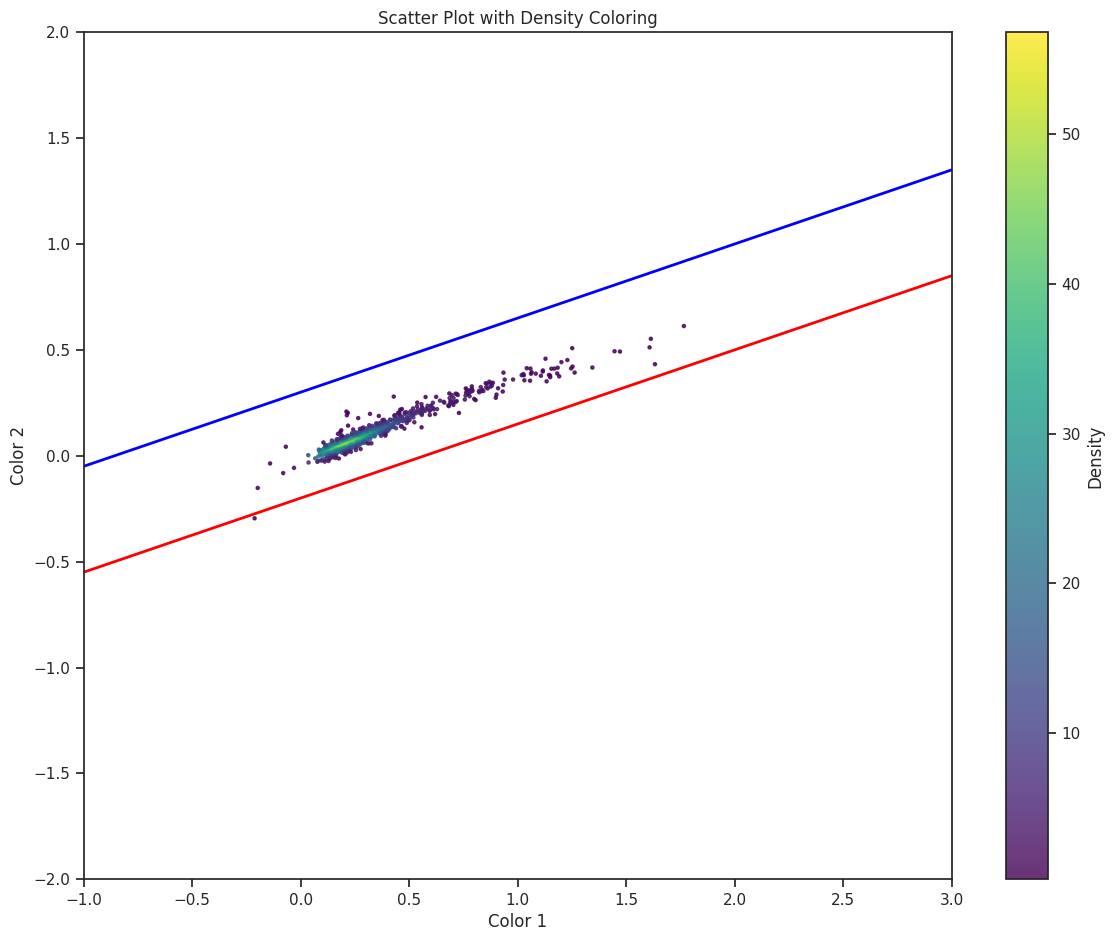

In [13]:
plots(ri_all, rj660_all, x_values, y_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2), sample_size=1000)

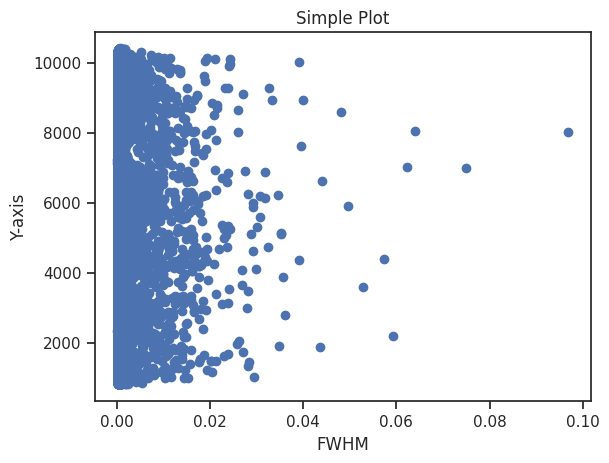

In [14]:
# Create a plot
plt.plot(tab["FWHM"], tab["Y"], "o")

# Add labels and title
plt.xlabel('FWHM')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()

#### Subsamples

In [15]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit_lower_all = (rj660_all <= 0.35*ri_all - 0.20)
color_crit_lower_all_vert = (ri_all >= 0.15) & (ri_all <= 0.25) 
mask_color_crit_lower_all = color_crit_lower_all & color_crit_lower_all_vert 

# upper_line = rj660 < equation(ri)
color_crit_upper_all = (rj660_all >= 0.35*ri_all + 0.30)

In [16]:
tab_below_all = tab[mask_color_crit_lower_all]

ri_below_all = tab_below_all["r_PStotal"] - tab_below_all["i_PStotal"]
rj660_below_all = tab_below_all["r_PStotal"] - tab_below_all["J0660_PStotal"]

In [17]:
tab_upper_all = tab[color_crit_upper_all]

ri_upper_all = tab_upper_all["r_PStotal"] - tab_upper_all["i_PStotal"]
rj660_upper_all = tab_upper_all["r_PStotal"] - tab_upper_all["J0660_PStotal"]

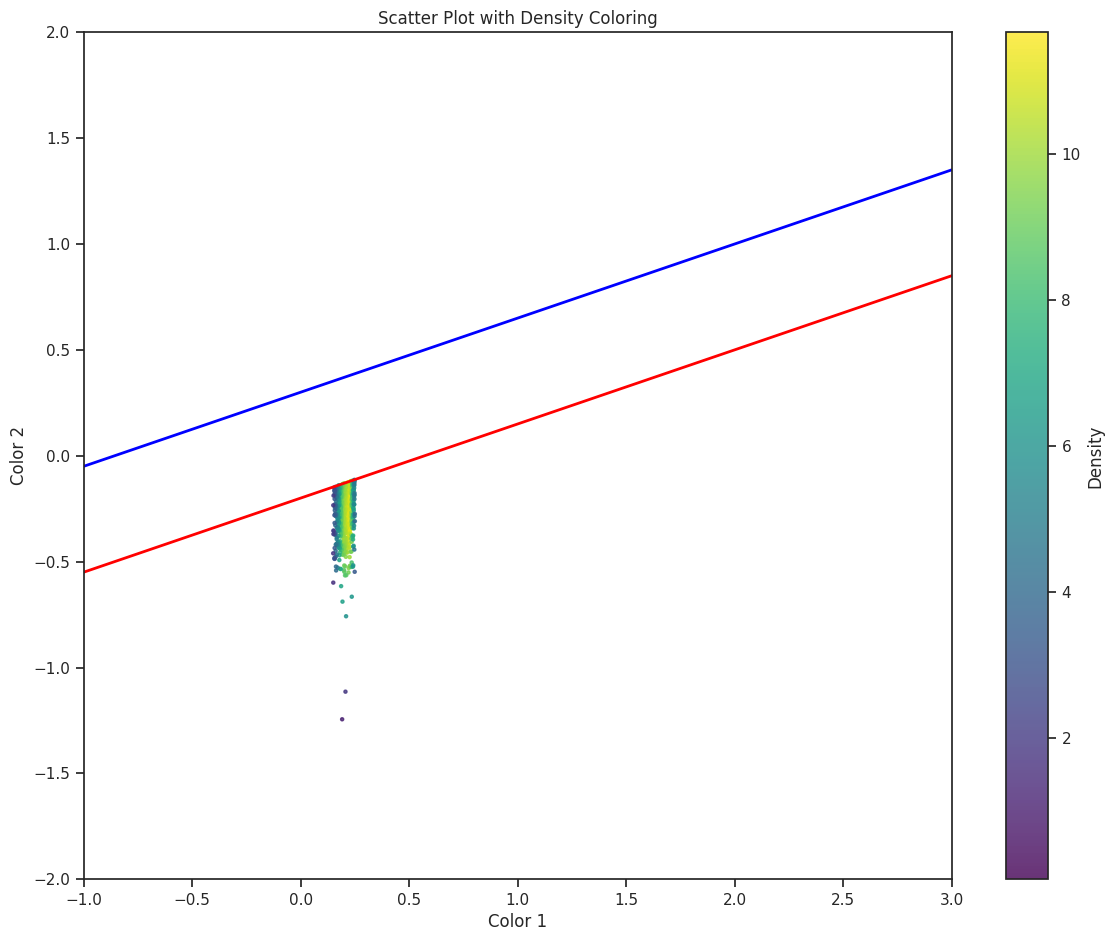

In [18]:
plots(ri_below_all, rj660_below_all, x_values, y_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2))

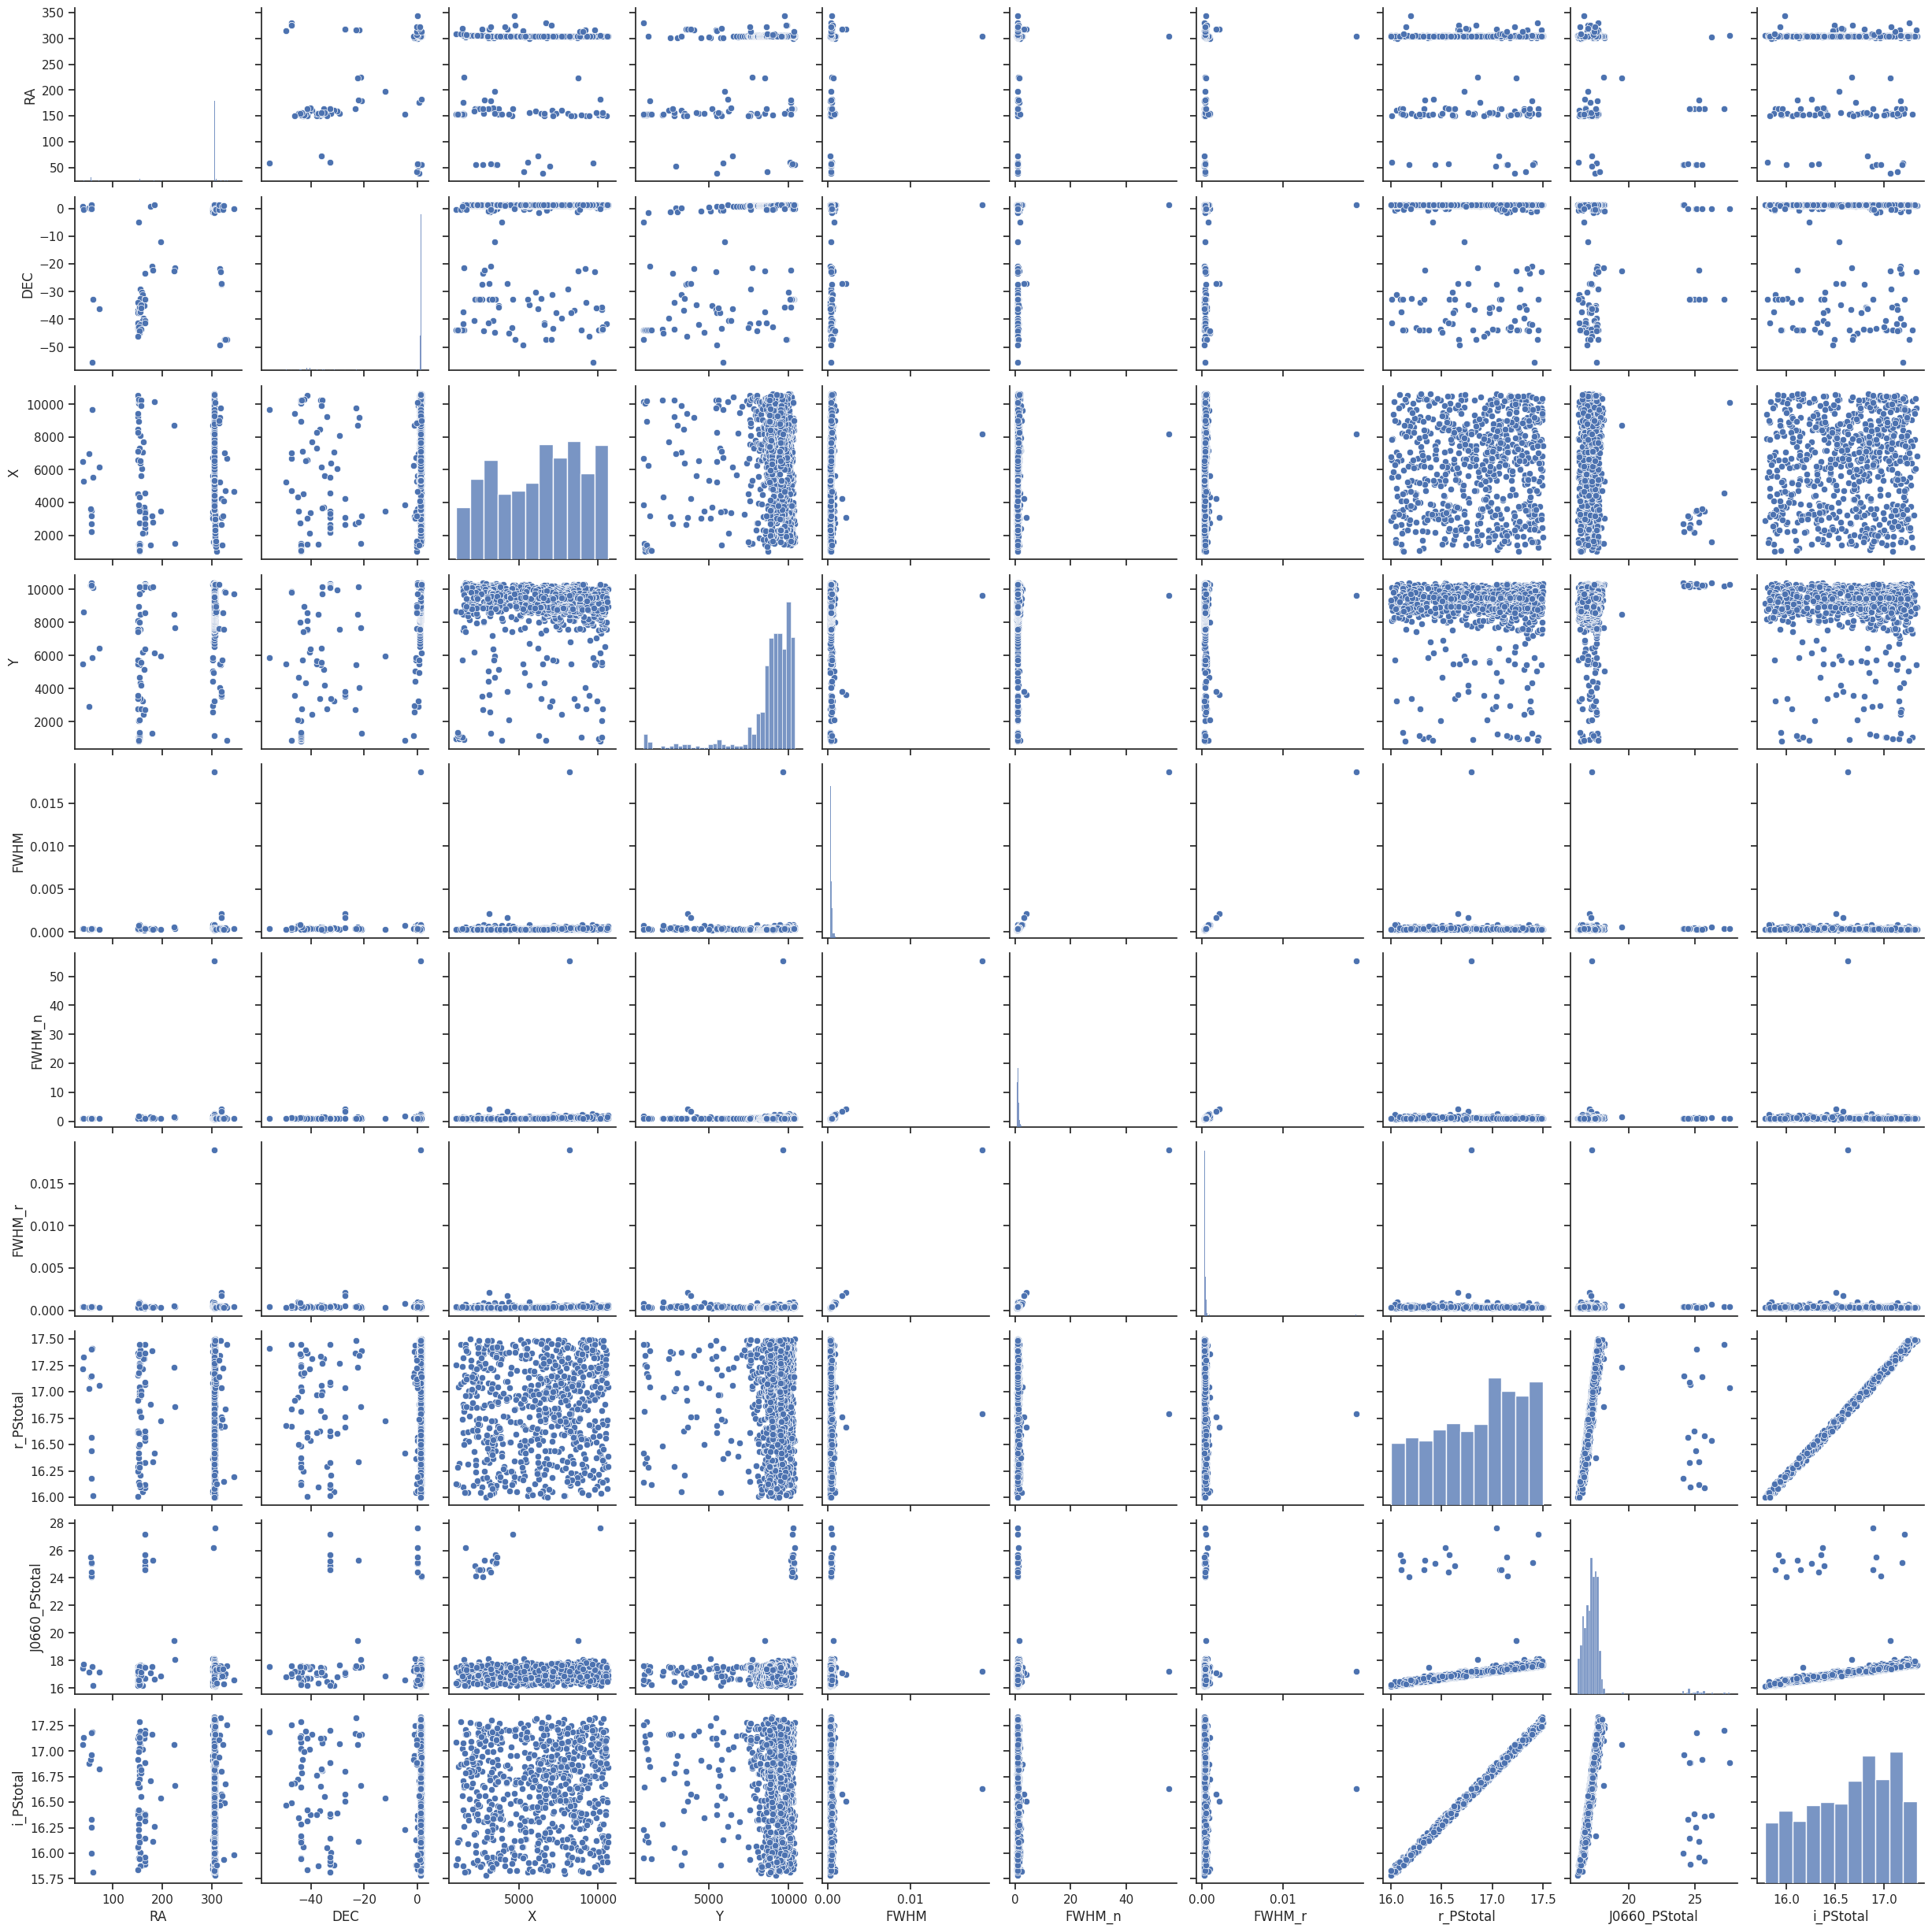

In [19]:
df_bellow_all = tab_below_all.to_pandas()
#Select columns 
df_bellow_all_ = df_bellow_all[["RA", "DEC", "X", "Y", "FWHM", "FWHM_n", "FWHM_r", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_bellow_all_)

In [20]:
# Creating the equation for the border
x_valuesss = np.linspace(1000, 11000, 100)  
# Compute y values using the equation
y_valuesss = equation(-0.12, 8900, x_valuesss)


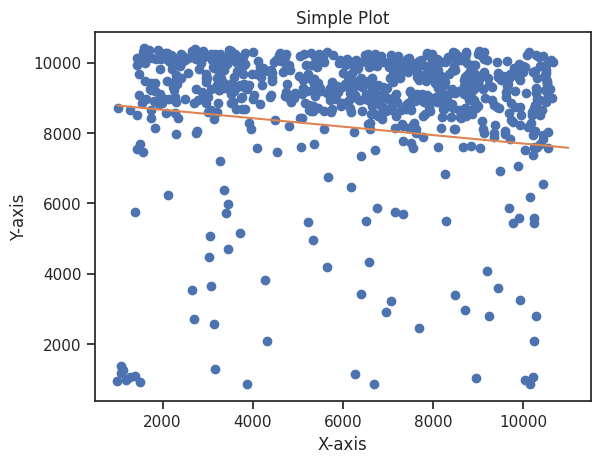

In [21]:
# Create a plot
plt.plot(tab_below_all["X"], tab_below_all['Y'], "o")
plt.plot(x_valuesss, y_valuesss)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


In [22]:
tmp = tab_below_all["Y"] <= -0.1*tab_below_all["X"] + 9000
tab_below_all_tmp = tab_below_all[tmp]

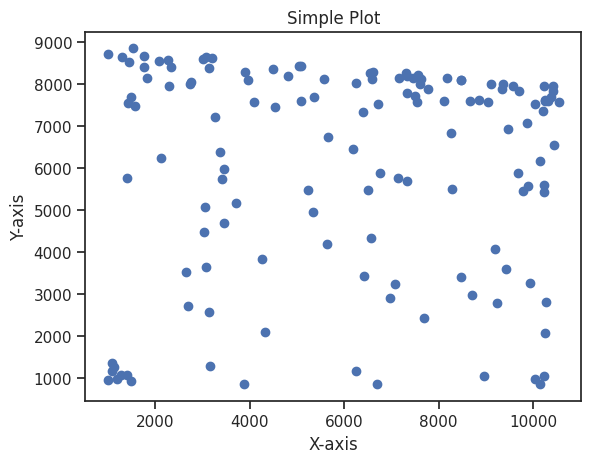

In [23]:
# Create a plot
plt.plot(tab_below_all_tmp["X"], tab_below_all_tmp['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


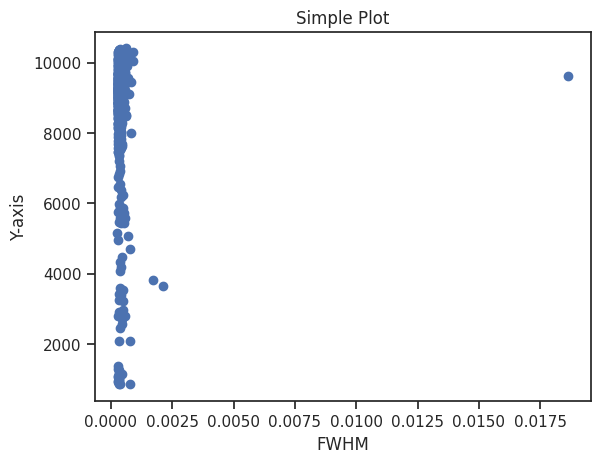

In [24]:
# Create a plot
plt.plot(tab_below_all["FWHM"], tab_below_all["Y"], "o")

# Add labels and title
plt.xlabel('FWHM')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


In [25]:
print("Min FWHM:", tab_below_all["FWHM"].min())
print("Max FWHM:", tab_below_all["FWHM"].max())

Min FWHM: 0.00026291262
Max FWHM: 0.018648108


In [26]:
tab_below_all_df = tab_below_all.to_pandas()
# Save Pandas DataFrame to CSV file
tab_below_all_df.to_csv("../iDR4-SPLUS-PStotal-PSF-16r175_class05_flags4_below_all.csv", index=False)

## Upper

In [27]:
tab_upper_all

<Table length=185>
     Field                      ID                       RA                 DEC             X         Y          FWHM     ... e_J0430_psf J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf  e_J0861_psf
     str16                    str31                   float64             float64        float64   float64     float64    ...   float64    float64    float64    float64    float64    float64     float64  
---------------- ------------------------------- ------------------ ------------------- --------- --------- ------------- ... ----------- --------- ----------- --------- ----------- ---------- -----------
   b'HYDRA-0014'    b'iDR4_3_HYDRA-0014_0040477' 155.15874147191832  -23.75442669396225  6853.704 6509.1787 0.00031687832 ...        0.03 17.488314       0.023 16.955956       0.087   17.08386        0.03
   b'HYDRA-0024'    b'iDR4_3_HYDRA-0024_0023328' 155.32350062751797 -25.448560916252635  8577.831 4523.1514   0.000330169 ...       0.028  17.74844       0.029 17.213911       0.027  17.601973       0.056
   b'HYDRA-0033'    b'iDR4_3_HYDRA-0033_0044128' 154.09468089895353 -26.596423316043342  9259.074 6101.5586 0.00034481758 ...       0.053 18.243473       0.025 16.758795       0.014  15.922646        0.02
   b'HYDRA-0035'    b'iDR4_3_HYDRA-0035_0008770' 157.10398687209212 -27.180305458142357 10105.141   2274.62  0.0003359262 ...       0.056 17.383392       0.046 16.650637        0.02  16.335047       0.023
   b'HYDRA-0036'    b'iDR4_3_HYDRA-0036_0042344'  159.1447270478591 -26.339426809995544  7430.185  7790.718  0.0003009748 ...       0.068 17.453405       0.043 16.909588       0.022   16.61403       0.027
   b'HYDRA-0038'    b'iDR4_3_HYDRA-0038_0038447' 162.86743717487985  -26.36764646182596  4117.285 7607.1943  0.0004491965 ...       0.045 17.862858       0.024  17.57564       0.126  17.318005       0.035
   b'HYDRA-0041'    b'iDR4_3_HYDRA-0041_0030453'  152.7880019367992  -28.08591451713852 6264.7925 5443.4854 0.00031268317 ...        0.04 17.194016       0.029 17.849737       0.232  16.569527       0.022
   b'HYDRA-0043'    b'iDR4_3_HYDRA-0043_0017281' 155.41380944451143 -28.379861093060537  9487.987 3508.4163 0.00036454207 ...       0.021        --          --  16.89286       0.023  17.139921       0.039
   b'HYDRA-0043'    b'iDR4_3_HYDRA-0043_0020295' 155.67946330577075  -28.30686827827364  7959.697 3993.3074  0.0003646011 ...       0.032 17.878138       0.022 17.373028       0.109   17.20166       0.042
   b'HYDRA-0048'    b'iDR4_3_HYDRA-0048_0007797' 164.58215300772628 -28.588014952148463  2561.335 2151.0603  0.0003185678 ...       0.043 17.514902       0.023 18.056896       0.172  17.211706       0.048
             ...                             ...                ...                 ...       ...       ...           ... ...         ...       ...         ...       ...         ...        ...         ...
b'STRIPE82-0103' b'iDR4_3_STRIPE82-0103_0068657'  311.3790571774872 -0.1705695192275222  8328.079   8965.93 0.00039612767 ...       0.109 18.616865       0.043  16.67981       0.072  16.831142       0.026
b'STRIPE82-0107' b'iDR4_3_STRIPE82-0107_0051163' 314.07101301474023 -0.3797768804759817  9261.988 7596.4023  0.0003792398 ...       0.044 17.207457       0.026 16.290943       0.013 15.8775215       0.022
b'STRIPE82-0107' b'iDR4_3_STRIPE82-0107_0069973'  314.9007015801428 -0.1759743257470575  3831.124   8930.57  0.0003499078 ...       0.078   18.1797       0.041 16.174767       0.012  15.068847       0.015
b'STRIPE82-0110' b'iDR4_3_STRIPE82-0110_0039390'  316.5666337758751  0.7398710825926058 2204.1252  5761.662 0.00048521787 ...       0.033 17.345928       0.027 16.979713       0.018  16.790401       0.025
b'STRIPE82-0111' b'iDR4_3_STRIPE82-0111_0028090'  317.9118420913478 -0.8808729733163627 2676.2253  4316.436 0.00031962857 ...       0.022 16.265135       0.014 15.703463       0.011  15.515327       0.018
b'STRIPE82-0113' b'iDR4_3_STRIPE82-0113_0007457'  318.1524167383622 -1.225213101956480

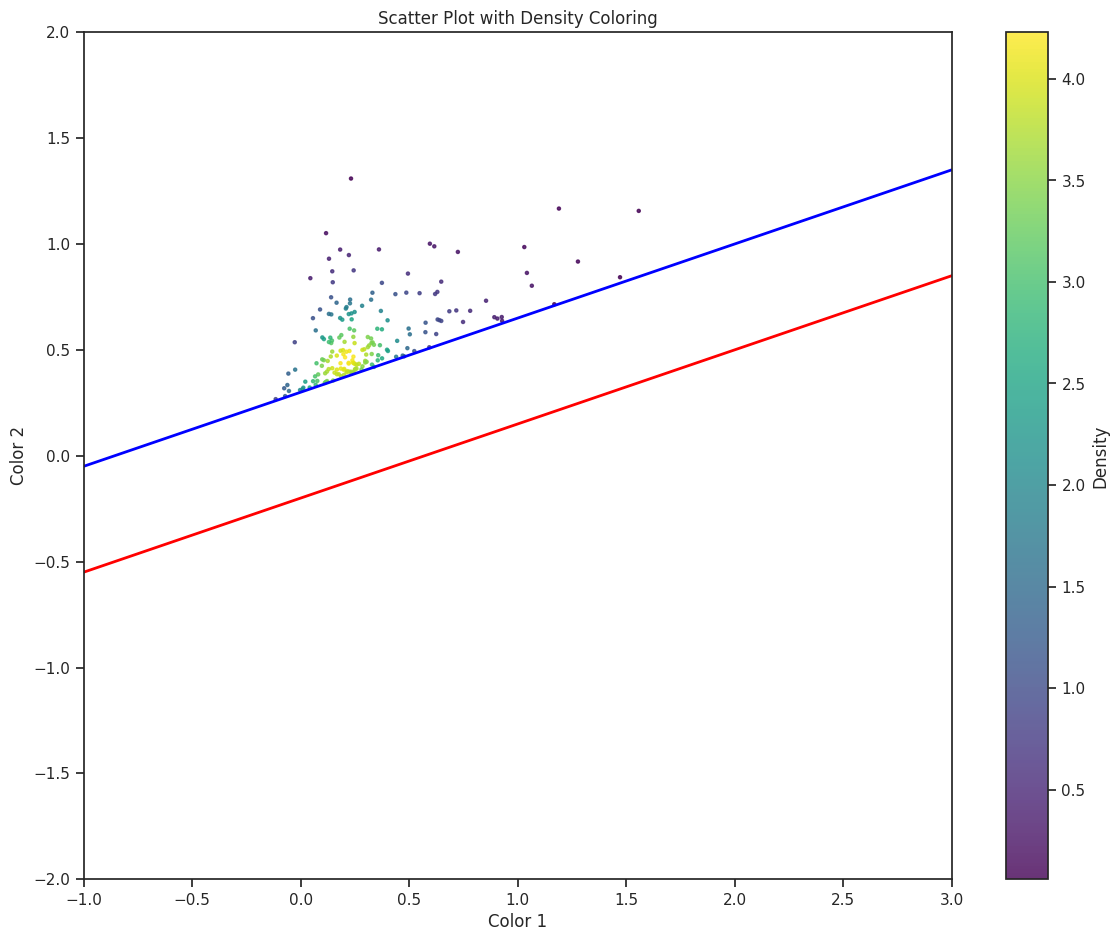

In [28]:
plots(ri_upper_all, rj660_upper_all, x_values, y_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2))

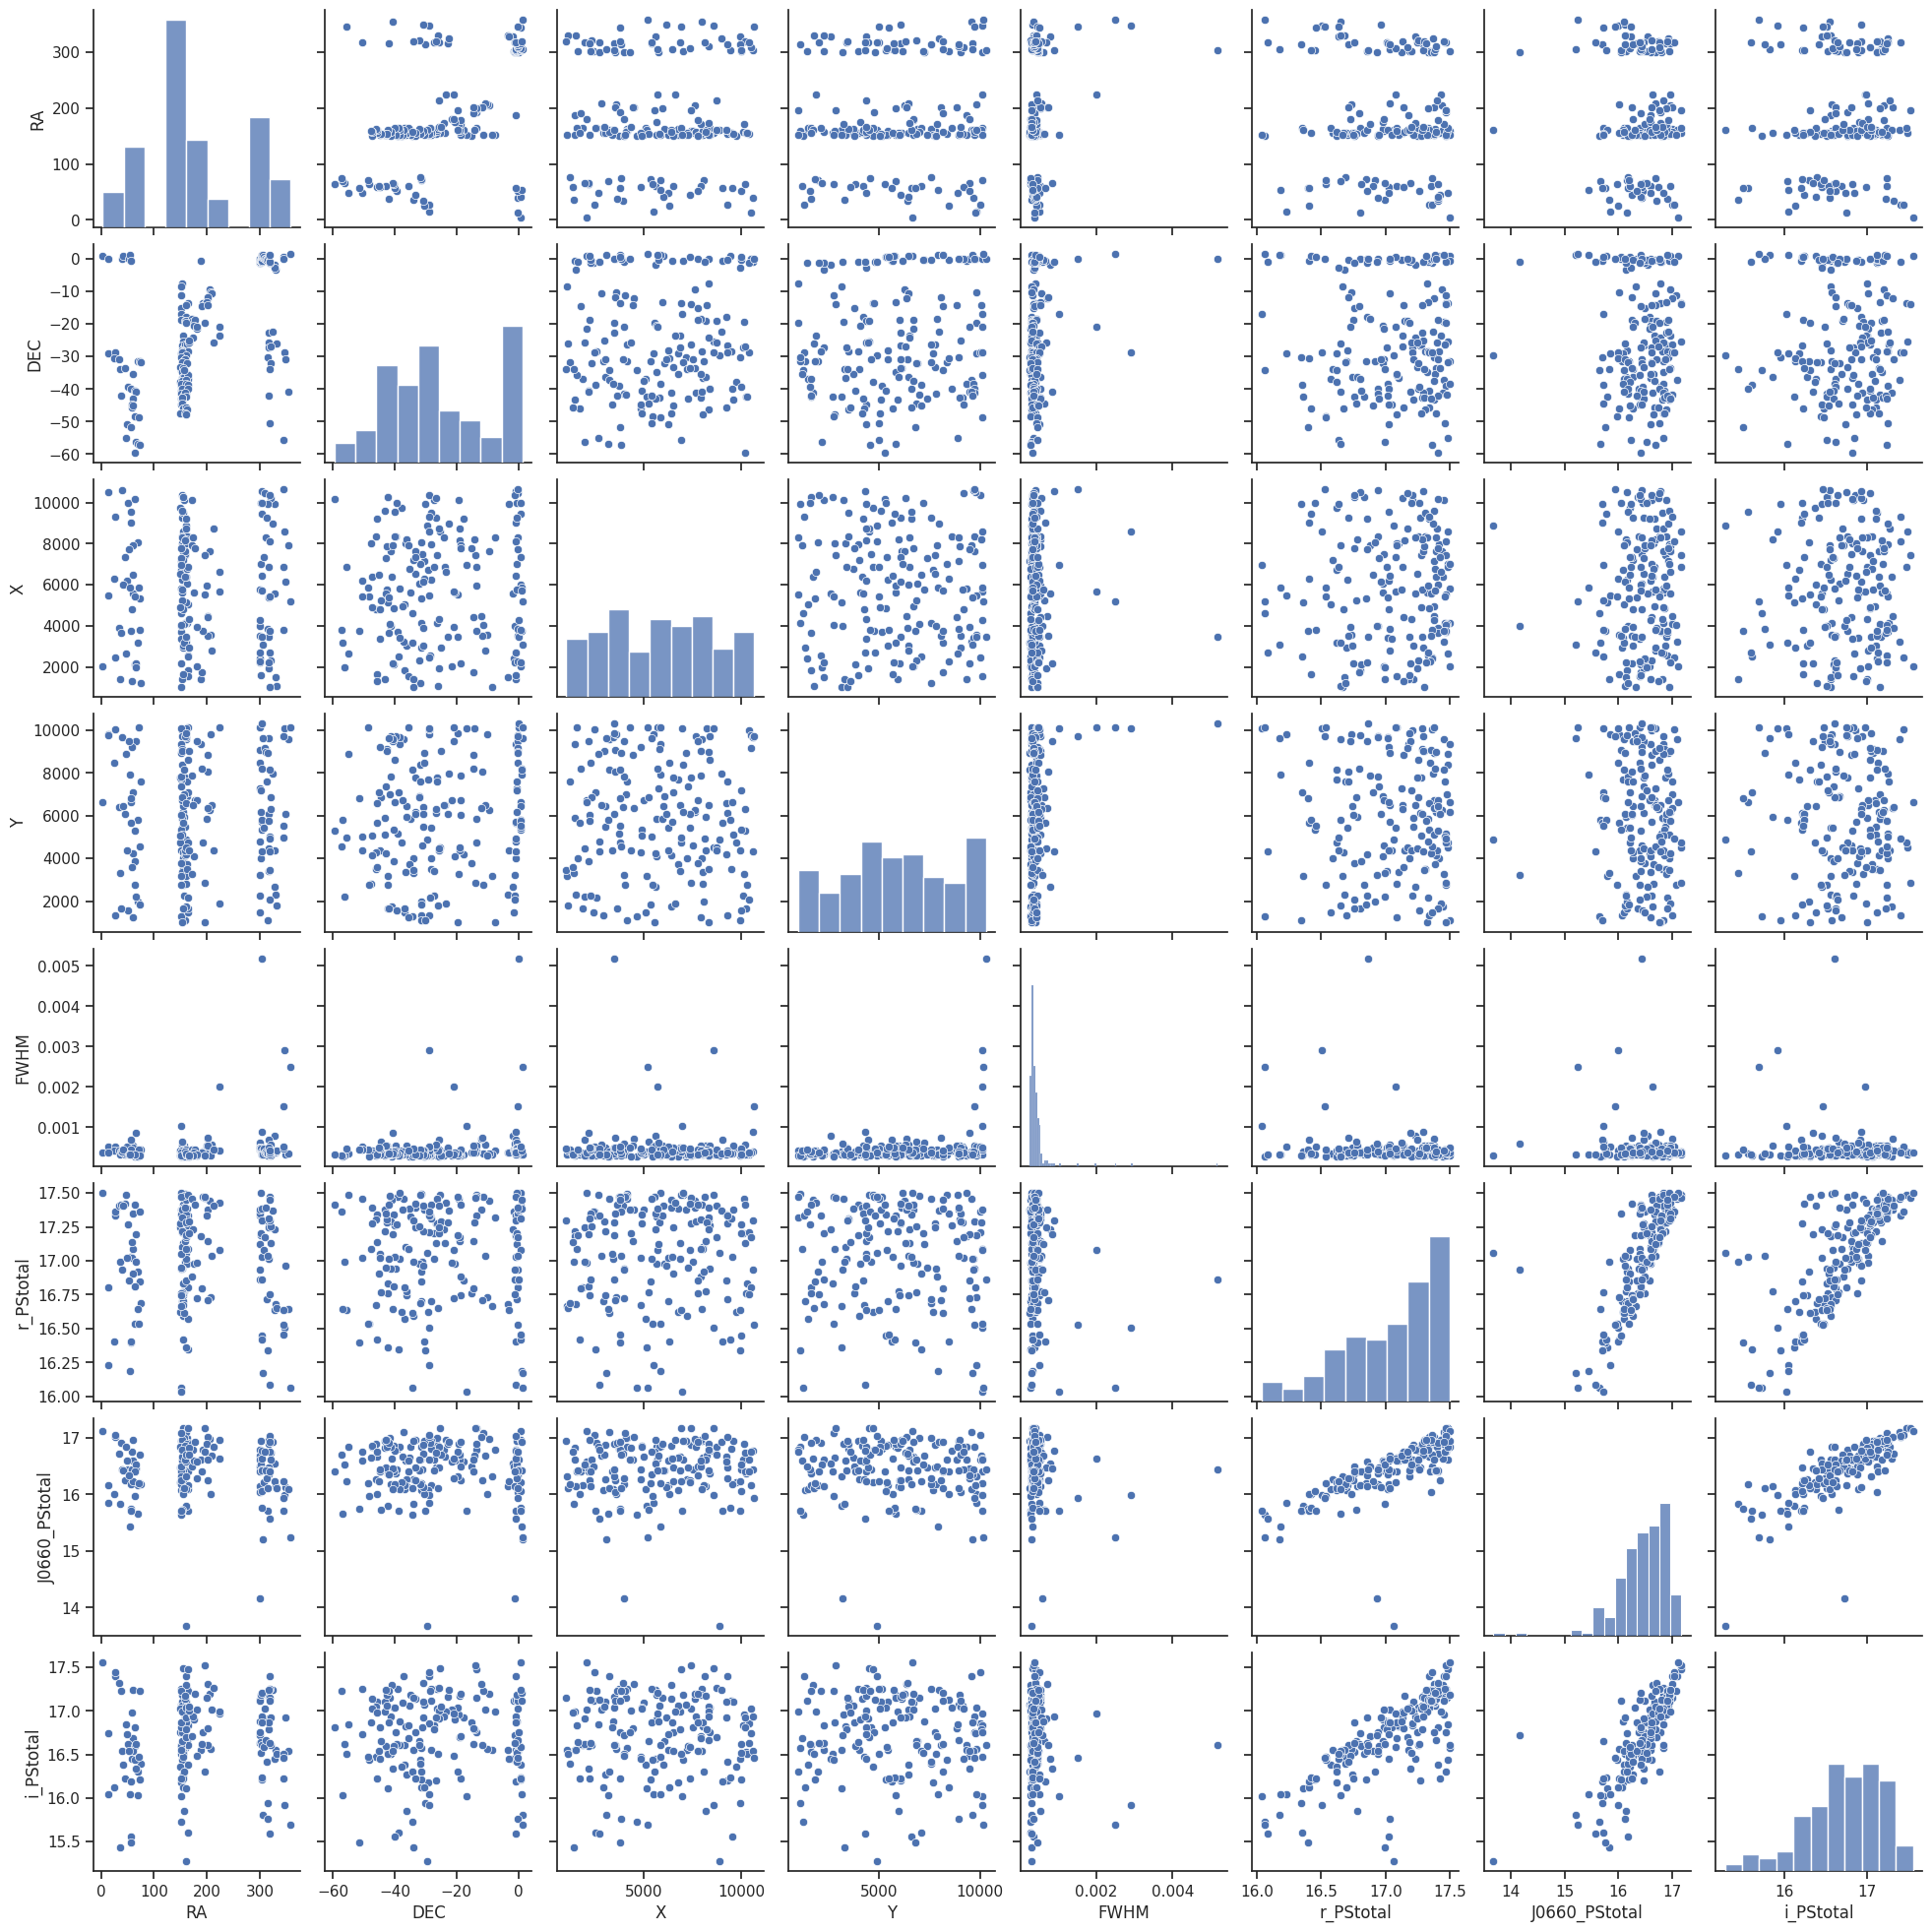

In [29]:
df_upper_all = tab_upper_all.to_pandas()
#Select columns 
df_upper_all_ = df_upper_all[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_upper_all_)

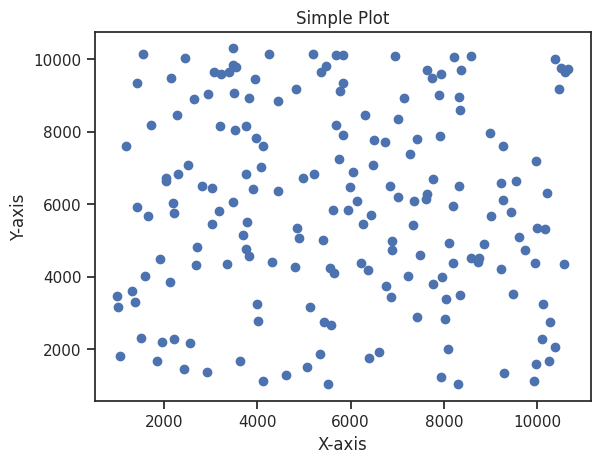

In [30]:
# Create a plot
plt.plot(tab_upper_all["X"], tab_upper_all['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


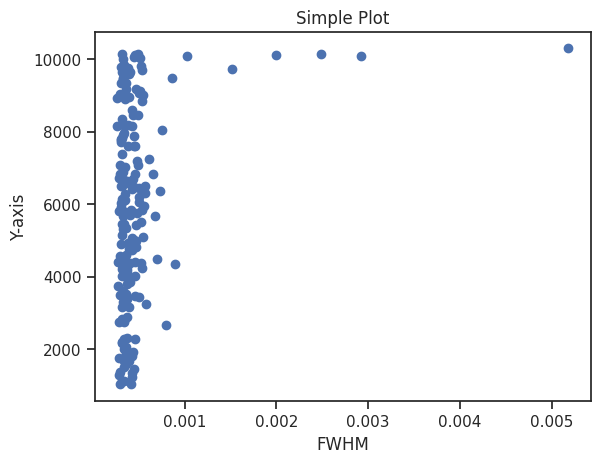

In [31]:
# Create a plot
plt.plot(tab_upper_all["FWHM"], tab_upper_all["Y"], "o")

# Add labels and title
plt.xlabel('FWHM')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()

In [32]:
print("Min FWHM:", tab_upper_all["FWHM"].min())
print("Max FWHM:", tab_upper_all["FWHM"].max())

Min FWHM: 0.00026714572
Max FWHM: 0.0051810234


### Cleaning

In [33]:
# Masking, usar FLATS menor que 4
# Masking
m_x = (tab["r_PStotal"] > 16) & (tab["r_PStotal"] <= 17.5) & (tab["J0660_PStotal"] <= 19.4) & (tab["i_PStotal"] <= 19.2)#& (tab["CLASS_STAR_R"] >= 0.6)
m_err = (tab["e_r_PStotal"]  <= 0.2) & (tab["e_J0660_PStotal"]  <= 0.2) & (tab["e_i_PStotal"]  <= 0.2)
# m_sn = (tab["SNR_WIN_R"]  >= 15) & (tab["SNR_WIN_F660"]  >= 15) & (tab["SNR_WIN_I"]  >= 15)
m_sn = (tab["s2n_r_PStotal"]  > 10) & (tab["s2n_J0660_PStotal"]  > 10) & (tab["s2n_i_PStotal"]  > 10)

# More restrictivo class star
m_star = tab["CLASS_STAR"] > 0.8

valid_ellipticity_range = (0.1, 0.8)  # Example valid range for ellipticity
valid_elongation_range = (1.0, 3.0)   # Example valid range for elongation
shape_mask = (tab['ELLIPTICITY'] >= valid_ellipticity_range[0]) & \
             (tab['ELLIPTICITY'] <= valid_ellipticity_range[1]) & \
             (tab['ELONGATION'] >= valid_elongation_range[0]) & \
             (tab['ELONGATION'] <= valid_elongation_range[1])

# Just ellpticity
m_ell = tab['ELLIPTICITY'] < 0.2

# Radius enclosing 50% of the total flux
m_rad_50 = tab["FLUX_RADIUS_50"] < 3

valid_fwhm_range = (0.0008, 1000.0)  # Example valid range for FWHM in pixels
fwhm_mask = (tab['FWHM'] >= valid_fwhm_range[0]) & \
            (tab['FWHM'] <= valid_fwhm_range[1])

# And the problematics borders
borders = tab["Y"] <= -0.12*tab["X"] + 8900


mask = m_x & m_err & m_ell & m_rad_50 & m_sn & borders #& fwhm_mask  # Use fwhm_mask instead of valid_fwhm_range
tab_clean = tab[mask]


In [34]:
tab_clean

<Table length=1331496>
     Field                      ID                       RA                 DEC             X         Y          FWHM     ... e_J0430_psf J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf e_J0861_psf
     str16                    str31                   float64             float64        float64   float64     float64    ...   float64    float64    float64    float64    float64    float64    float64  
---------------- ------------------------------- ------------------ ------------------- --------- --------- ------------- ... ----------- --------- ----------- --------- ----------- --------- -----------
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000122' 149.95779351072906 -24.588993162849363 10330.665 1033.1914 0.00038261065 ...       0.065 17.525698       0.051 17.206259       0.043 17.104158       0.051
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000137' 150.53438843177778 -24.589628435940263  6898.353 1042.0739 0.00038054702 ...       0.048  16.50867       0.041  16.17667       0.126  15.96467       0.041
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000200' 150.11957039012938 -24.587242536374468  9367.654 1049.7621 0.00036712646 ...       0.086 17.697142       0.046 16.147823       0.038 15.237605       0.038
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000231' 150.10498873868107 -24.586636004731165  9454.478 1053.3187  0.0003560575 ...       0.058  16.94614       0.042 16.559822       0.034 16.446606       0.041
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000251' 149.94493140038858  -24.58506458729816 10407.386 1058.4563 0.00038528105 ...       0.063 16.672747       0.051  16.16926       0.038  16.06434        0.05
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000258' 150.20432856777433 -24.585943983095145  8863.133 1060.4884 0.00036169682 ...       0.045 16.559212       0.038 16.198776       0.034 16.064566       0.041
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000275'  150.0963243009554  -24.58362137225116  9506.151 1072.8041 0.00035416606 ...       0.063 17.386658       0.043 16.822823        0.04 16.600042       0.048
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000303' 150.25721891091845 -24.583908741321757  8548.333 1075.0433 0.00034676297 ...       0.074 17.876438       0.049 17.222729       0.036 17.009333       0.051
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000399'   150.963835691451  -24.58267441348724  4342.092 1087.9712  0.0003211944 ...       0.037 16.704052       0.033 16.419573       0.048 16.209764       0.043
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000436' 149.95880623104986  -24.57728609329602 10325.075 1109.8707  0.0003615905 ...        0.08 18.138697       0.057  17.46126       0.043 17.241158       0.054
             ...                             ...                ...                 ...       ...       ...           ... ...         ...       ...         ...       ...         ...       ...         ...
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044056'  358.9587640687316  1.0711767067004434 3039.1829 7930.2056  0.0003101897 ...       0.031 17.392931       0.022 16.897514       0.027  16.58114       0.033
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044008'  357.9664432998729   1.034861172967917  9533.597  7692.736 0.00033393837 ...       0.019 16.331703       0.015        --          -- 15.902755       0.023
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044294' 358.59692404055465  1.0671179316713364  5407.261 7903.4873  0.0003215628 ...       0.025 17.442448       0.021 17.199068       0.026  16.94332       0.033
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044560' 357.98475201483944  1.0340229611157803  9413.763  7687.226 0.00031936957 ...       0.062  17.97368       0.029 17.115196       0.031 16.691492        0.03
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044720'  358.1954335454755  1.0633539959530949  8034.838 7879.0083  0.0003164592 ...       0.036  17.47337       0.021        --          -- 16.139307       0.024
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0046047'  358.8840648163042   1.023075456186546 3528.0452 761

In [35]:
ri = tab_clean["r_PStotal"] - tab_clean["i_PStotal"]
rj660 = tab_clean["r_PStotal"] - tab_clean["J0660_PStotal"]

In [36]:
print(len(ri), len(rj660), len(x_values), len(y_values), len(y_values1))

1331496 1331496 100 100 100


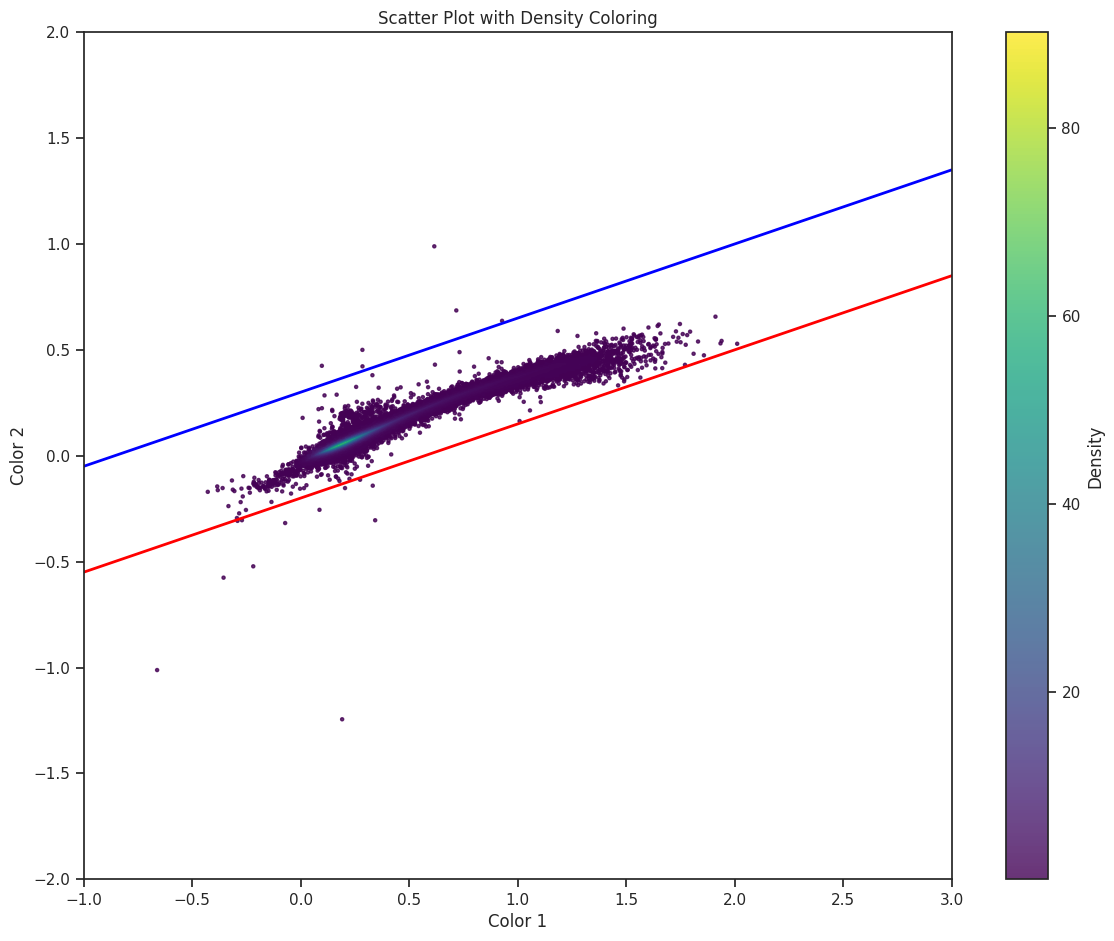

In [37]:
plots(ri, rj660, x_values, y_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2), sample_size=50000)

In [38]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit = (rj660  <= 0.35*ri - 0.20)

# upper_line = rj660 < equation(ri)
color_crit_upper = (rj660 >= 0.35*ri + 0.30)

In [39]:
tab_clean_below = tab_clean[color_crit]

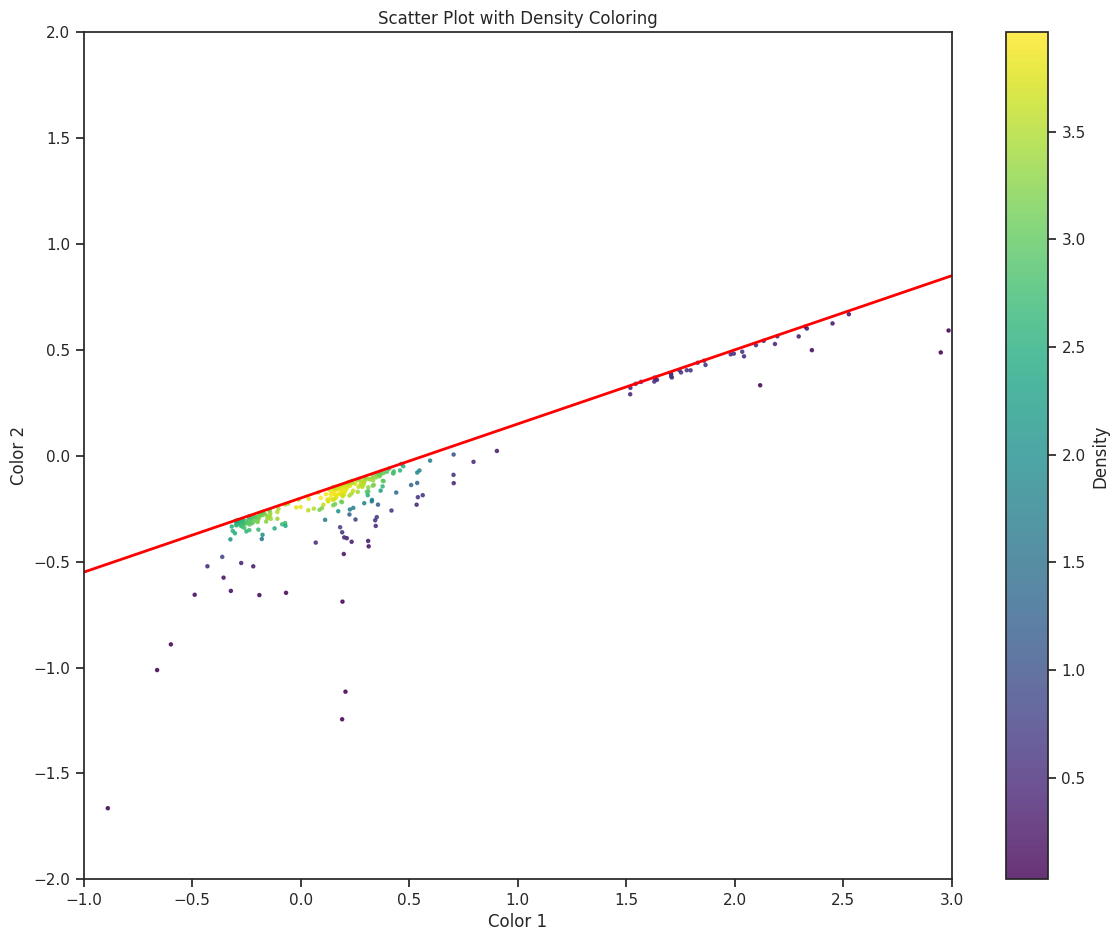

In [40]:
ri_below = tab_clean_below["r_PStotal"] - tab_clean_below["i_PStotal"]
rj660_below = tab_clean_below["r_PStotal"] - tab_clean_below["J0660_PStotal"]



plots(ri_below, rj660_below, x_values, y_values, xlim=(-1.0, 3), ylim=(-2, 2))


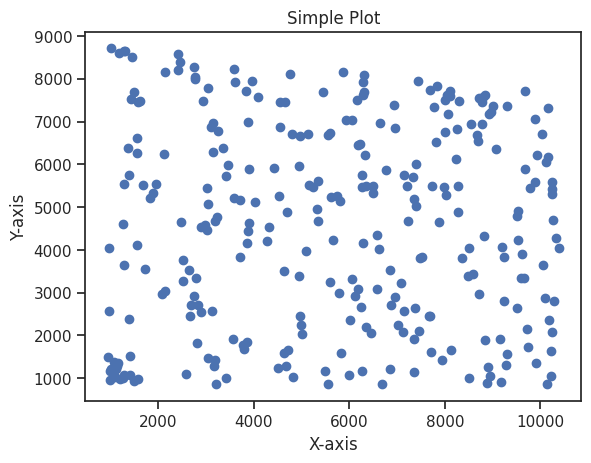

In [41]:
# Create a plot
plt.plot(tab_clean_below["X"], tab_clean_below['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


In [42]:
tab_clean_upper = tab_clean[color_crit_upper]
tab_clean_upper

<Table length=131>
     Field                      ID                       RA                 DEC             X         Y          FWHM     ... e_J0430_psf J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf  e_J0861_psf
     str16                    str31                   float64             float64        float64   float64     float64    ...   float64    float64    float64    float64    float64    float64     float64  
---------------- ------------------------------- ------------------ ------------------- --------- --------- ------------- ... ----------- --------- ----------- --------- ----------- ---------- -----------
   b'HYDRA-0014'    b'iDR4_3_HYDRA-0014_0040477' 155.15874147191832  -23.75442669396225  6853.704 6509.1787 0.00031687832 ...        0.03 17.488314       0.023 16.955956       0.087   17.08386        0.03
   b'HYDRA-0024'    b'iDR4_3_HYDRA-0024_0023328' 155.32350062751797 -25.448560916252635  8577.831 4523.1514   0.000330169 ...       0.028  17.74844       0.029 17.213911       0.027  17.601973       0.056
   b'HYDRA-0033'    b'iDR4_3_HYDRA-0033_0044128' 154.09468089895353 -26.596423316043342  9259.074 6101.5586 0.00034481758 ...       0.053 18.243473       0.025 16.758795       0.014  15.922646        0.02
   b'HYDRA-0035'    b'iDR4_3_HYDRA-0035_0008770' 157.10398687209212 -27.180305458142357 10105.141   2274.62  0.0003359262 ...       0.056 17.383392       0.046 16.650637        0.02  16.335047       0.023
   b'HYDRA-0036'    b'iDR4_3_HYDRA-0036_0042344'  159.1447270478591 -26.339426809995544  7430.185  7790.718  0.0003009748 ...       0.068 17.453405       0.043 16.909588       0.022   16.61403       0.027
   b'HYDRA-0038'    b'iDR4_3_HYDRA-0038_0038447' 162.86743717487985  -26.36764646182596  4117.285 7607.1943  0.0004491965 ...       0.045 17.862858       0.024  17.57564       0.126  17.318005       0.035
   b'HYDRA-0041'    b'iDR4_3_HYDRA-0041_0030453'  152.7880019367992  -28.08591451713852 6264.7925 5443.4854 0.00031268317 ...        0.04 17.194016       0.029 17.849737       0.232  16.569527       0.022
   b'HYDRA-0043'    b'iDR4_3_HYDRA-0043_0017281' 155.41380944451143 -28.379861093060537  9487.987 3508.4163 0.00036454207 ...       0.021        --          --  16.89286       0.023  17.139921       0.039
   b'HYDRA-0043'    b'iDR4_3_HYDRA-0043_0020295' 155.67946330577075  -28.30686827827364  7959.697 3993.3074  0.0003646011 ...       0.032 17.878138       0.022 17.373028       0.109   17.20166       0.042
   b'HYDRA-0048'    b'iDR4_3_HYDRA-0048_0007797' 164.58215300772628 -28.588014952148463  2561.335 2151.0603  0.0003185678 ...       0.043 17.514902       0.023 18.056896       0.172  17.211706       0.048
             ...                             ...                ...                 ...       ...       ...           ... ...         ...       ...         ...       ...         ...        ...         ...
b'STRIPE82-0089' b'iDR4_3_STRIPE82-0089_0068568'  301.6585060447913 -0.5945868591610879  7014.116 6190.4453 0.00050026865 ...       0.072 17.998161       0.039 17.349382       0.057  17.157423       0.032
b'STRIPE82-0089' b'iDR4_3_STRIPE82-0089_0082597' 301.20707845956696 -0.4407670449413124   9969.11  7197.104 0.00047510464 ...          -- 18.528906       0.065  16.79991       0.045  16.310312       0.019
b'STRIPE82-0093' b'iDR4_3_STRIPE82-0093_0058223' 304.58016480996145   -0.67123844988002  6444.585  5688.743  0.0004003493 ...        0.04 17.395685       0.023 16.946407       0.072  16.875196       0.023
b'STRIPE82-0094' b'iDR4_3_STRIPE82-0094_0076584' 304.69448032904097  1.1082839383968444  5696.369 8172.9507 0.00033166082 ...          -- 17.900883       0.105  17.56792       0.193  17.500397       0.106
b'STRIPE82-0098' b'iDR4_3_STRIPE82-0098_0043111' 307.27721473665054  0.6875337877070881  7345.155  5418.958 0.00046925727 ...          -- 18.305292       0.039 16.558786       0.069  16.457798       0.022
b'STRIPE82-0107' b'iDR4_3_STRIPE82-0107_0051163' 314.07101301474023 -0.379776880475981

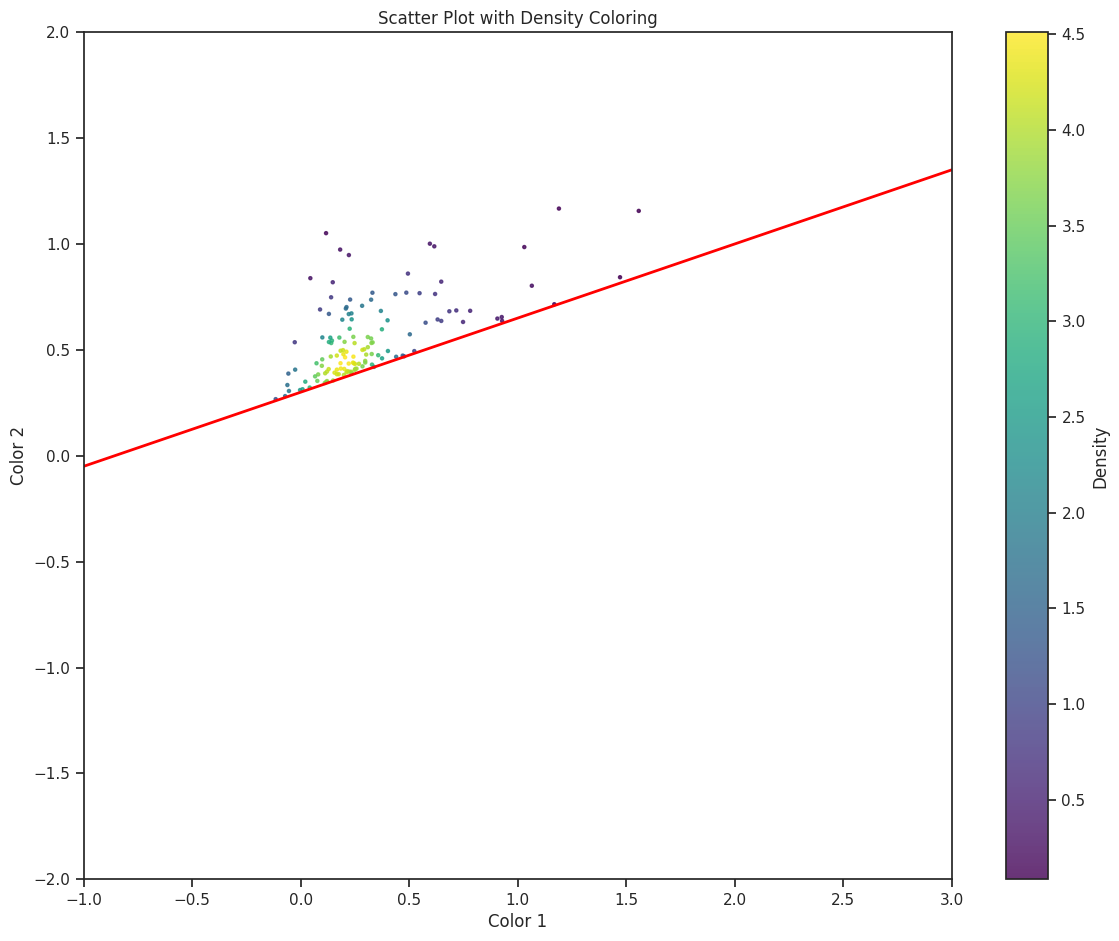

In [43]:
ri_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["i_PStotal"]
rj660_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["J0660_PStotal"]


plots(ri_upper, rj660_upper, x_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2))


In [44]:
len(tab_clean_below["Field"])
   

290

In [45]:
# Saving
# Save the table as a CSV file
#tab_clean_below.write('iDR4-SPLUS-PStotal-PSF-16r175_class06_flags4_bellow.csv', format='csv', overwrite=True)


Examining the position of these object on the CCD

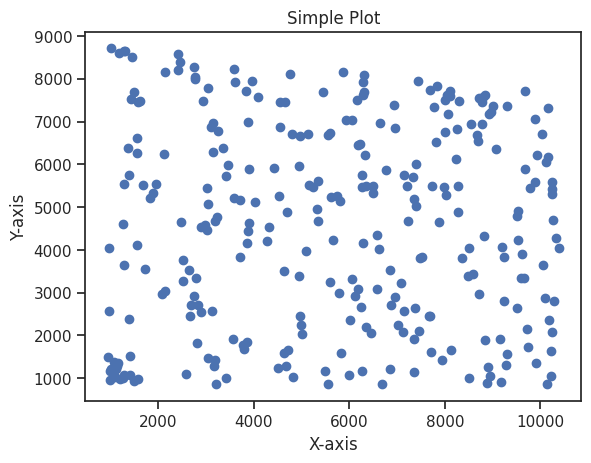

In [46]:
# Create a plot
plt.plot(tab_clean_below["X"], tab_clean_below['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


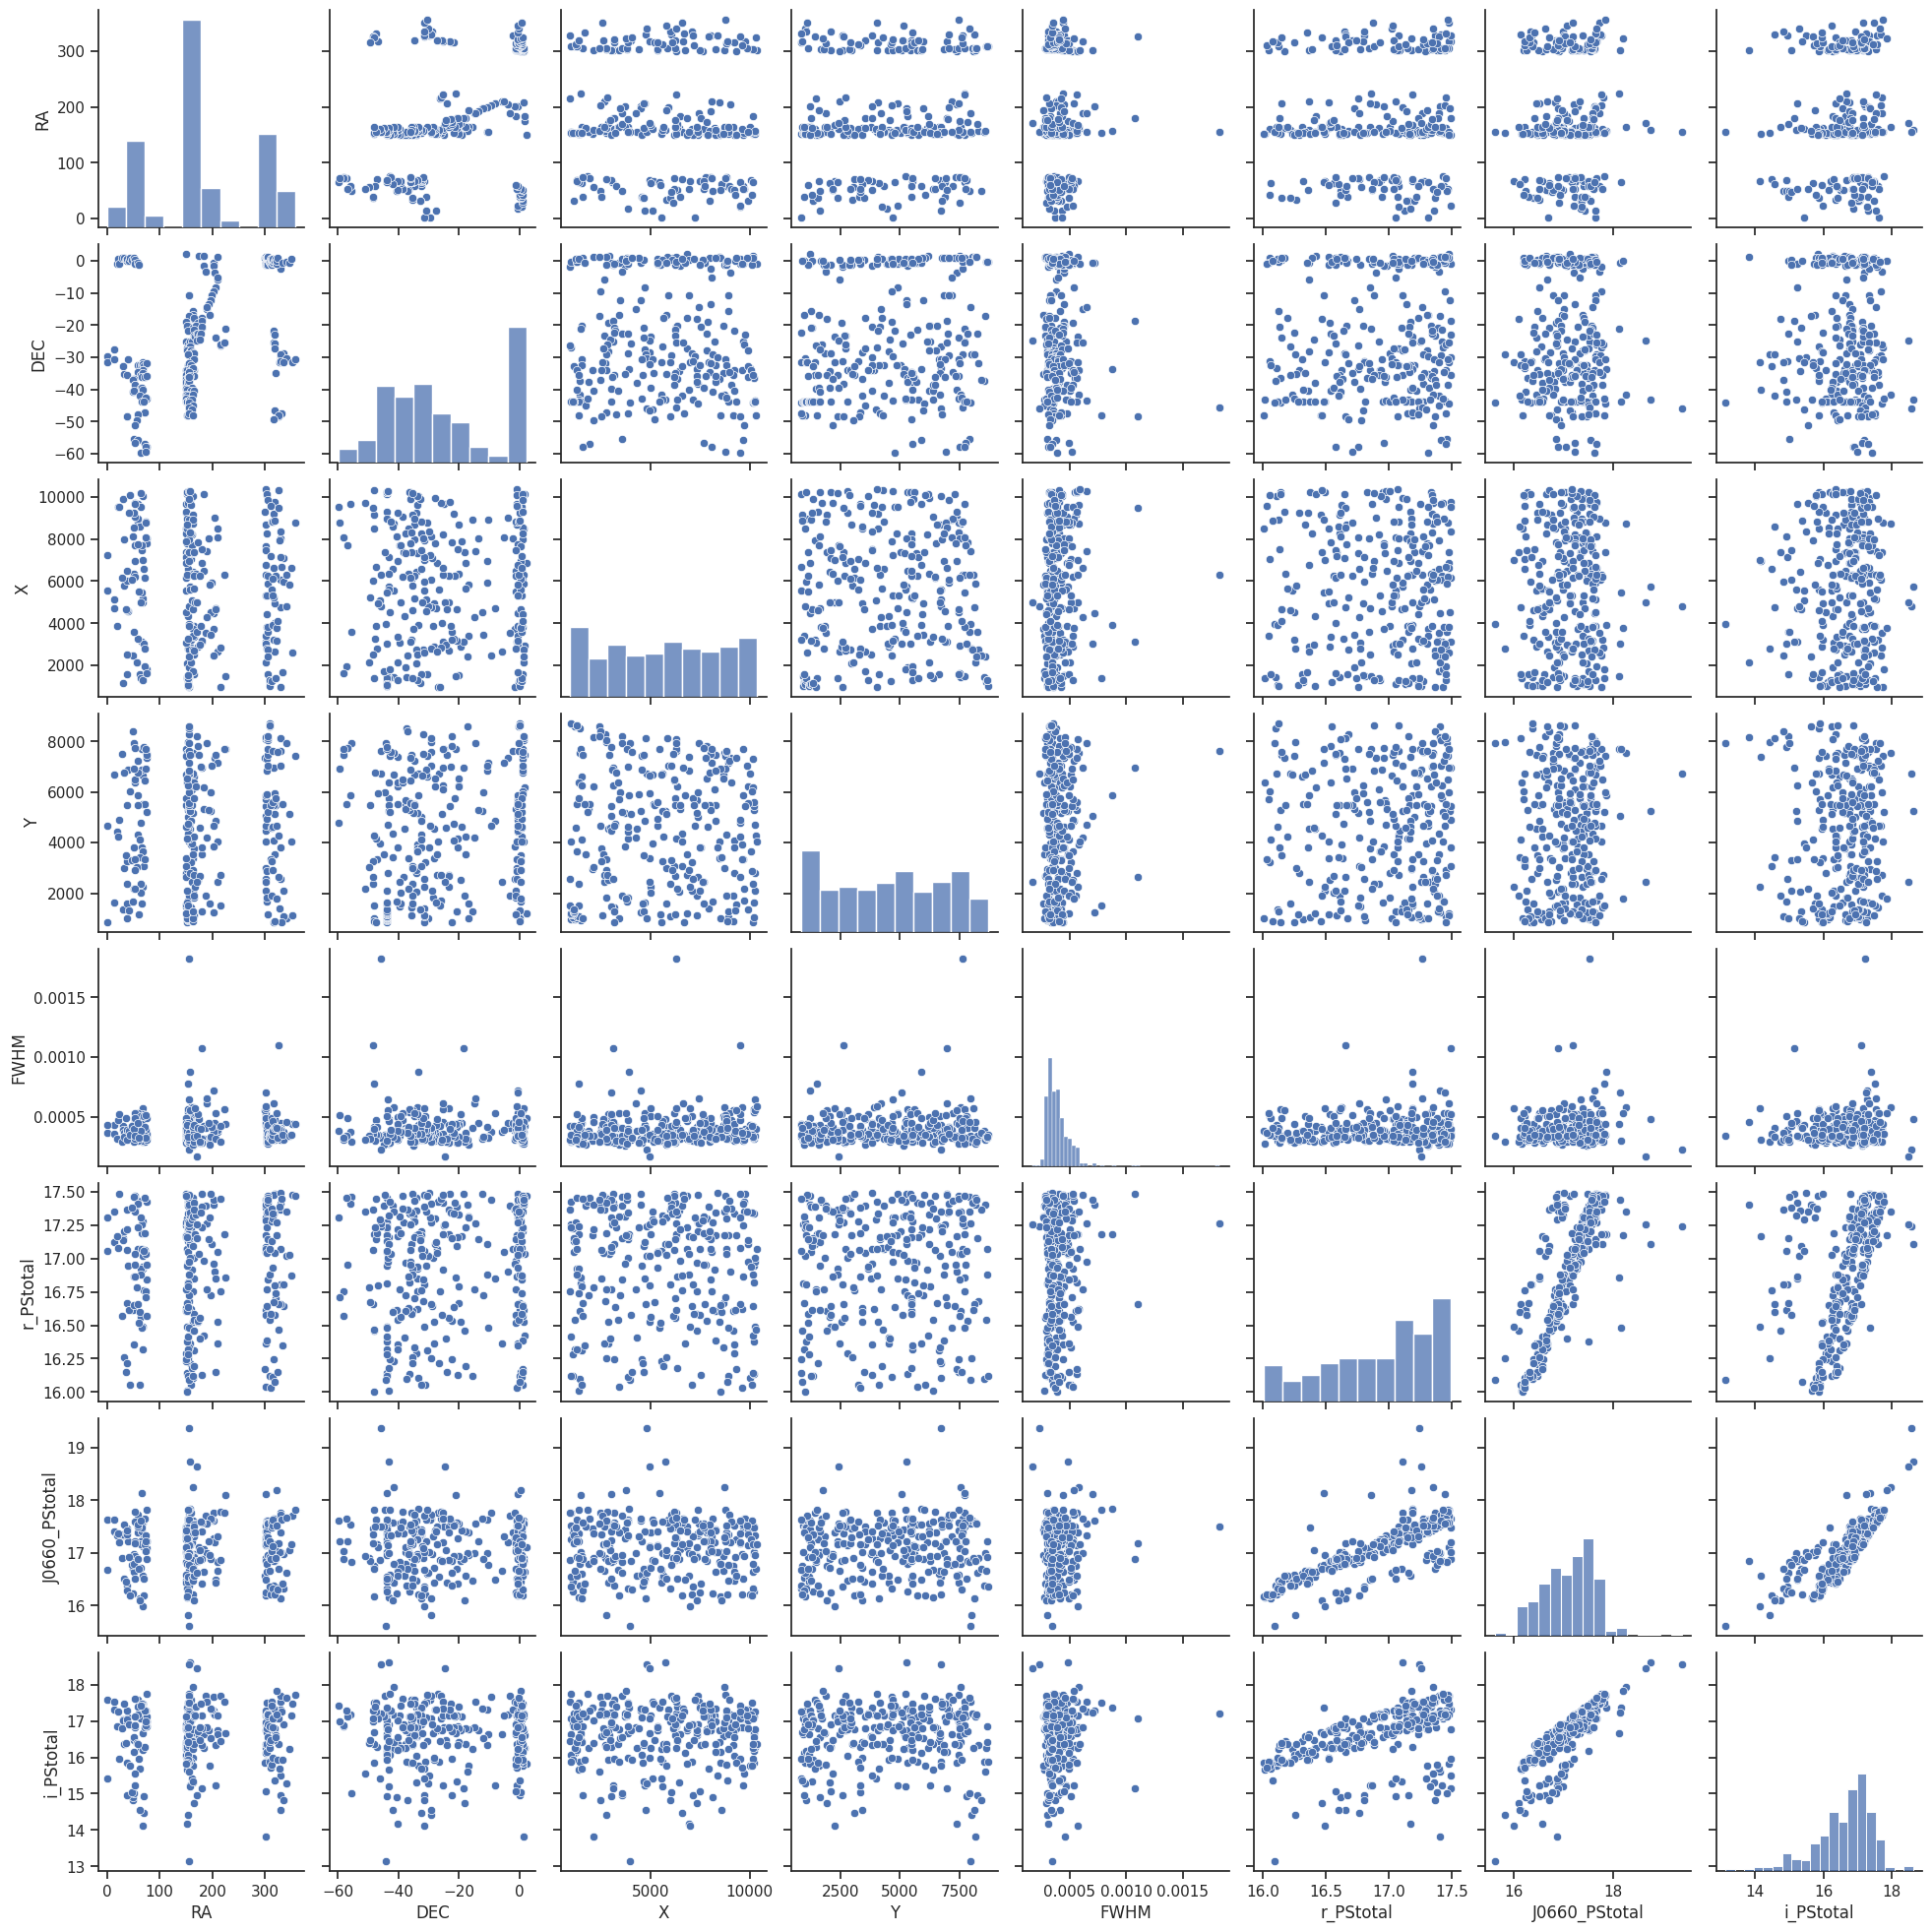

In [47]:
df_bellow = tab_clean_below.to_pandas()
#Select columns 
df_bellow_ = df_bellow[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_bellow_)

### Object in the upper region

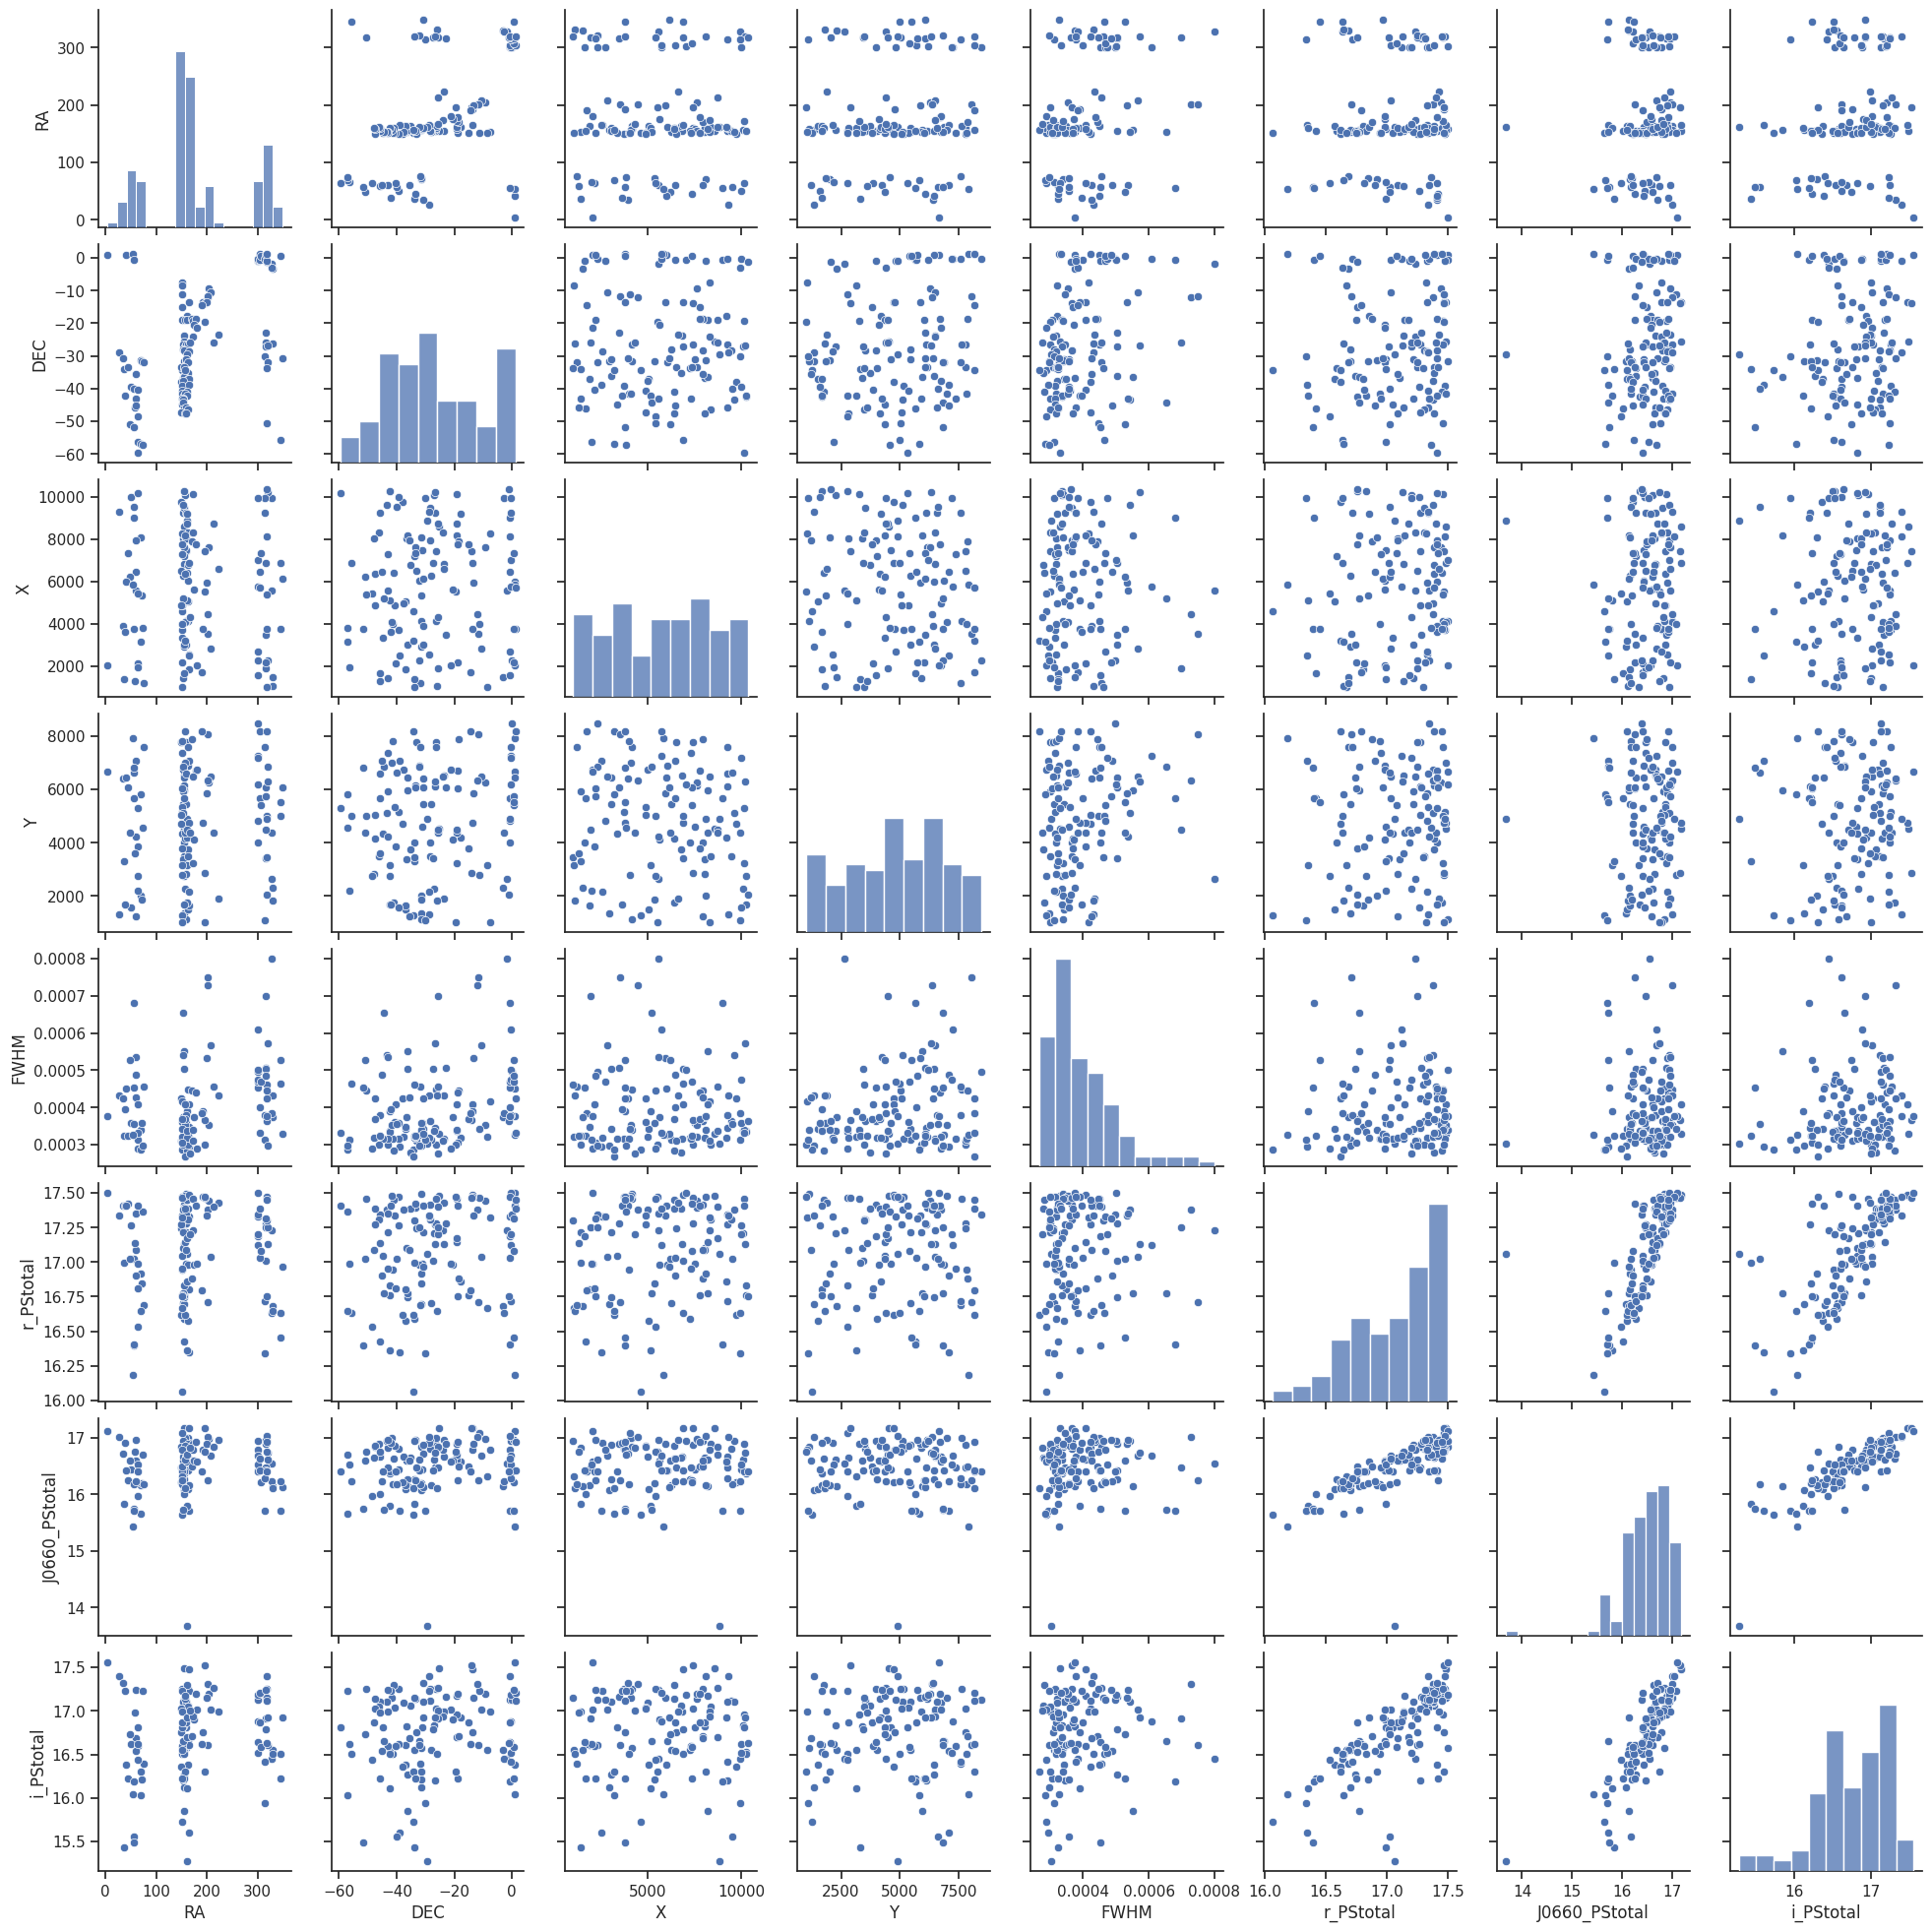

In [48]:
df_upper = tab_clean_upper.to_pandas()
#Select columns 
df_upper_ = df_upper[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_upper_)

### JUST ONE FIELD

In [49]:
mask_field = tab_clean["Field"] == "b'STRIPE82-0170'"
tab_clean_field = tab_clean[mask_field]

In [50]:
tab_clean_field

<Table length=383>
     Field                      ID                       RA                 DEC             X          Y           FWHM     ... e_J0430_psf J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf  e_J0861_psf
     str16                    str31                   float64             float64        float64    float64      float64    ...   float64    float64    float64    float64    float64    float64     float64  
---------------- ------------------------------- ------------------ ------------------- ---------- ---------- ------------- ... ----------- --------- ----------- --------- ----------- ---------- -----------
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000376' 358.73307506277445 -0.0002457514797156   4516.001   916.8456 0.00034253247 ...       0.028 17.171087       0.022        --          --  16.572111        0.04
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000462' 358.94991838192817  0.0052723879779816   3096.529  952.97034  0.0003287349 ...       0.025  16.97038       0.021        --          --  15.881601       0.038
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000453' 358.72518747022553  0.0034336334086949   4567.634  940.93243 0.00033050953 ...          -- 18.516962       0.037        --          -- 15.8997345       0.038
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000409'  357.9958375910409  0.0035549699388775    9342.05   941.7279 0.00038176985 ...       0.042 17.344988       0.033 16.395008       0.046  16.075373       0.049
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000471' 359.13661274766605  0.0055202984317476    1874.36  954.59424  0.0003411065 ...       0.036 17.589111       0.025        --          --  17.145151       0.042
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000838'  358.0620060926749  0.0212735813167264   8908.861  1057.7255 0.00037311274 ...       0.038  17.64047       0.036 17.331152       0.037  17.230934       0.058
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000527'  358.6057975799354  0.0104447963552466   5349.155   986.8303 0.00032968094 ...       0.029 17.267513       0.024        --          --  16.909222       0.042
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000722'  359.2693705401812   0.015004855289632 1005.24286 1016.68933  0.0003485548 ...       0.063 17.940928        0.03        --          --  16.016615       0.036
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000544'  358.1851629602566  0.0097463700415051   8102.641   982.2597 0.00035596406 ...       0.143 18.794767        0.04  17.11006       0.031 15.8796625       0.046
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0001005' 359.03224619301204  0.0239606706542623  2557.6008  1075.3153  0.0003301633 ...       0.021 16.445942       0.016        --          --  15.968629       0.034
             ...                             ...                ...                 ...        ...        ...           ... ...         ...       ...         ...       ...         ...        ...         ...
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044056'  358.9587640687316  1.0711767067004434  3039.1829  7930.2056  0.0003101897 ...       0.031 17.392931       0.022 16.897514       0.027   16.58114       0.033
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044008'  357.9664432998729   1.034861172967917   9533.597   7692.736 0.00033393837 ...       0.019 16.331703       0.015        --          --  15.902755       0.023
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044294' 358.59692404055465  1.0671179316713364   5407.261  7903.4873  0.0003215628 ...       0.025 17.442448       0.021 17.199068       0.026   16.94332       0.033
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044560' 357.98475201483944  1.0340229611157803   9413.763   7687.226 0.00031936957 ...       0.062  17.97368       0.029 17.115196       0.031  16.691492        0.03
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0044720'  358.1954335454755  1.0633539959530949   8034.838  7879.0083  0.0003164592 ...       0.036  17.47337       0.021        --          --  16.139307       0.024
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0046047'

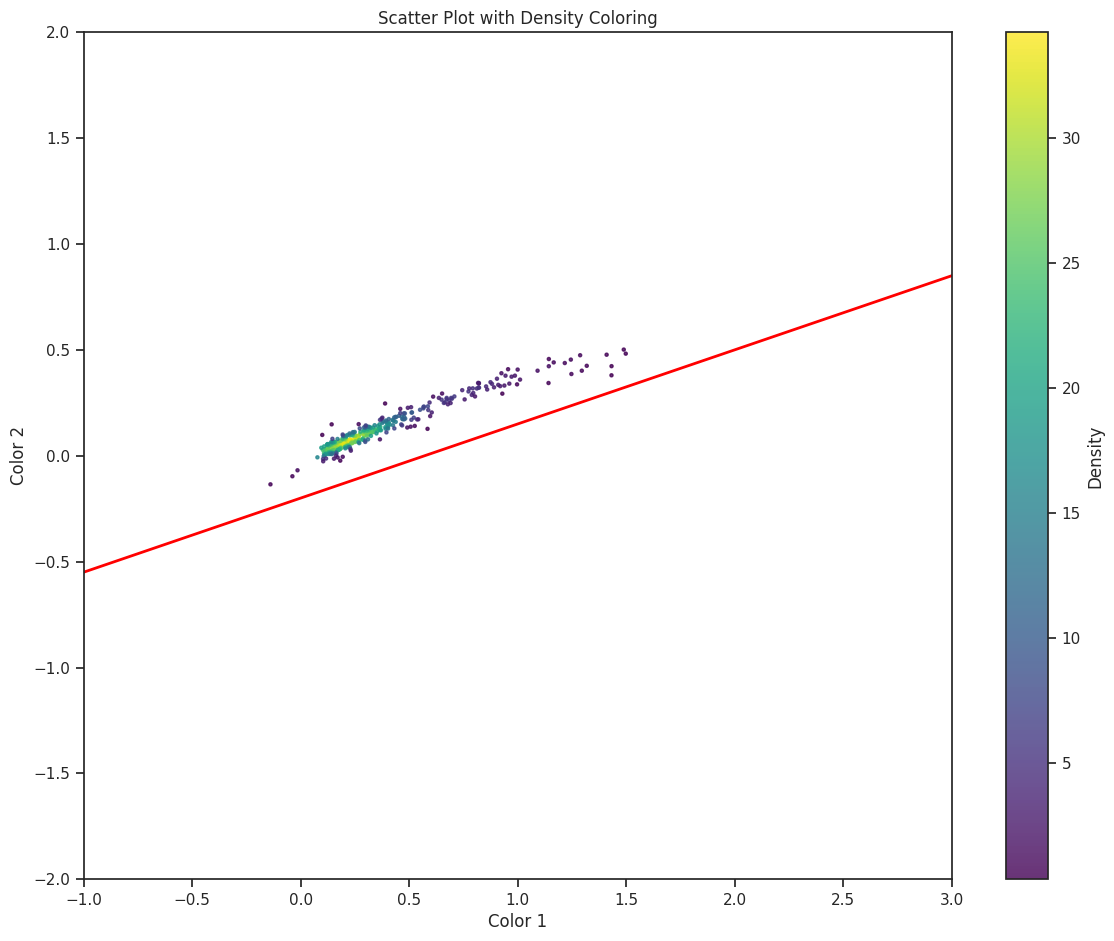

In [51]:
plots(tab_clean_field["r_PStotal"] - tab_clean_field["i_PStotal"], tab_clean_field["r_PStotal"] - tab_clean_field["J0660_PStotal"], x_values, y_values, xlim=(-1.0, 3), ylim=(-2, 2))

In [52]:
tab_clean_df = tab_clean.to_pandas()
# Save Pandas DataFrame to CSV file
tab_clean_df.to_csv("../iDR4-SPLUS-PStotal-PSF-16r175_class05_flags4_clean.csv", index=False)